# Visualizing Monetary Policy

In [1]:
! pip install pandas-datareader

In [2]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt


start = datetime.datetime(1948, 1,1)
end = datetime.datetime.today()

# download data:
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df

GDPC1
DATE                 
1948-03-31   2087.442
1948-06-30   2121.899
1948-09-30   2134.056
1948-12-31   2136.440
1949-03-31   2107.001
...               ...
2021-12-31  20006.181
2022-03-31  19924.088
2022-06-30  19895.271
2022-09-30  20054.663
2022-12-31  20187.495

[300 rows x 1 columns]

<AxesSubplot:xlabel='DATE'>

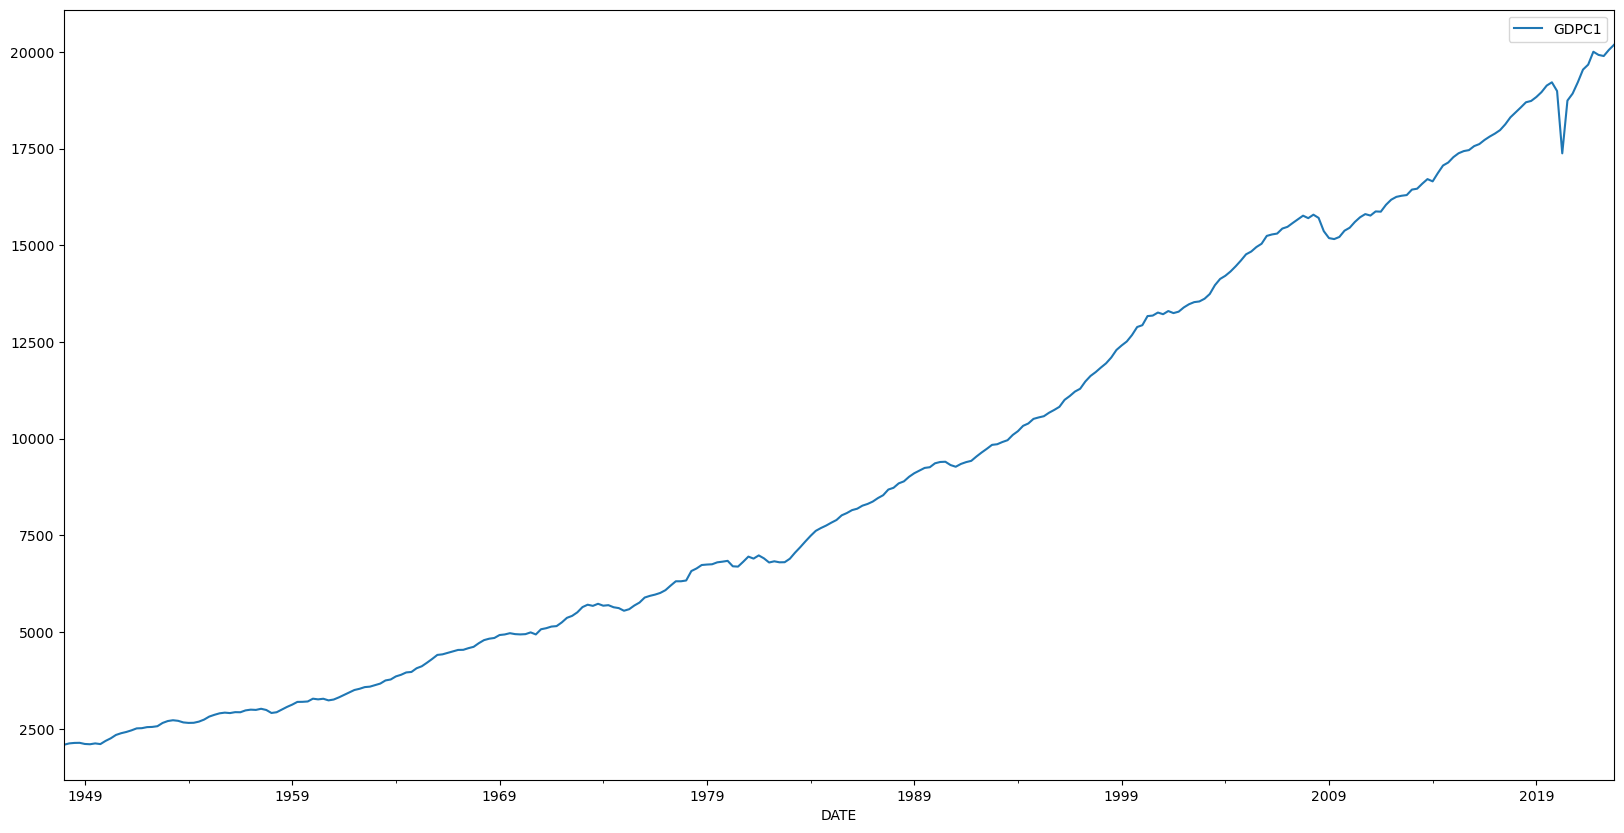

In [3]:
df.plot.line(figsize = (20,10))

In [4]:
# create a system:
def gather_data(data_codes,
               start,
                # default end to today:
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
                # resample to desired frequency and take the mean
                code, "fred", start, end).resample(freq).mean() # alts: .first() or .last() or .median ...
            # rename columns to code:key
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            
    return df
            

In [5]:
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                   # set frequency to weekly
                  freq = "W")

In [6]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"].mul(1000)

In [7]:
# data is weekly
data.iloc[-10:]

Base: Total  Base: Currency in Circulation
DATE                                                  
2020-07-12    4772522.0                      1974690.0
2020-07-19    4772522.0                      1978510.0
2020-07-26    4609143.0                      1982873.0
2020-08-02    4609143.0                      1988190.0
2020-08-09    4750981.0                      1996626.0
2020-08-16    4750981.0                      2003019.0
2020-08-23    4830999.0                      2007458.0
2020-08-30    4830999.0                      2010991.0
2020-09-06    4876690.0                      2016895.0
2020-09-13    4876690.0                      2026998.0

## Breaking down the Federal Reserve's balance sheet

<AxesSubplot:xlabel='DATE'>

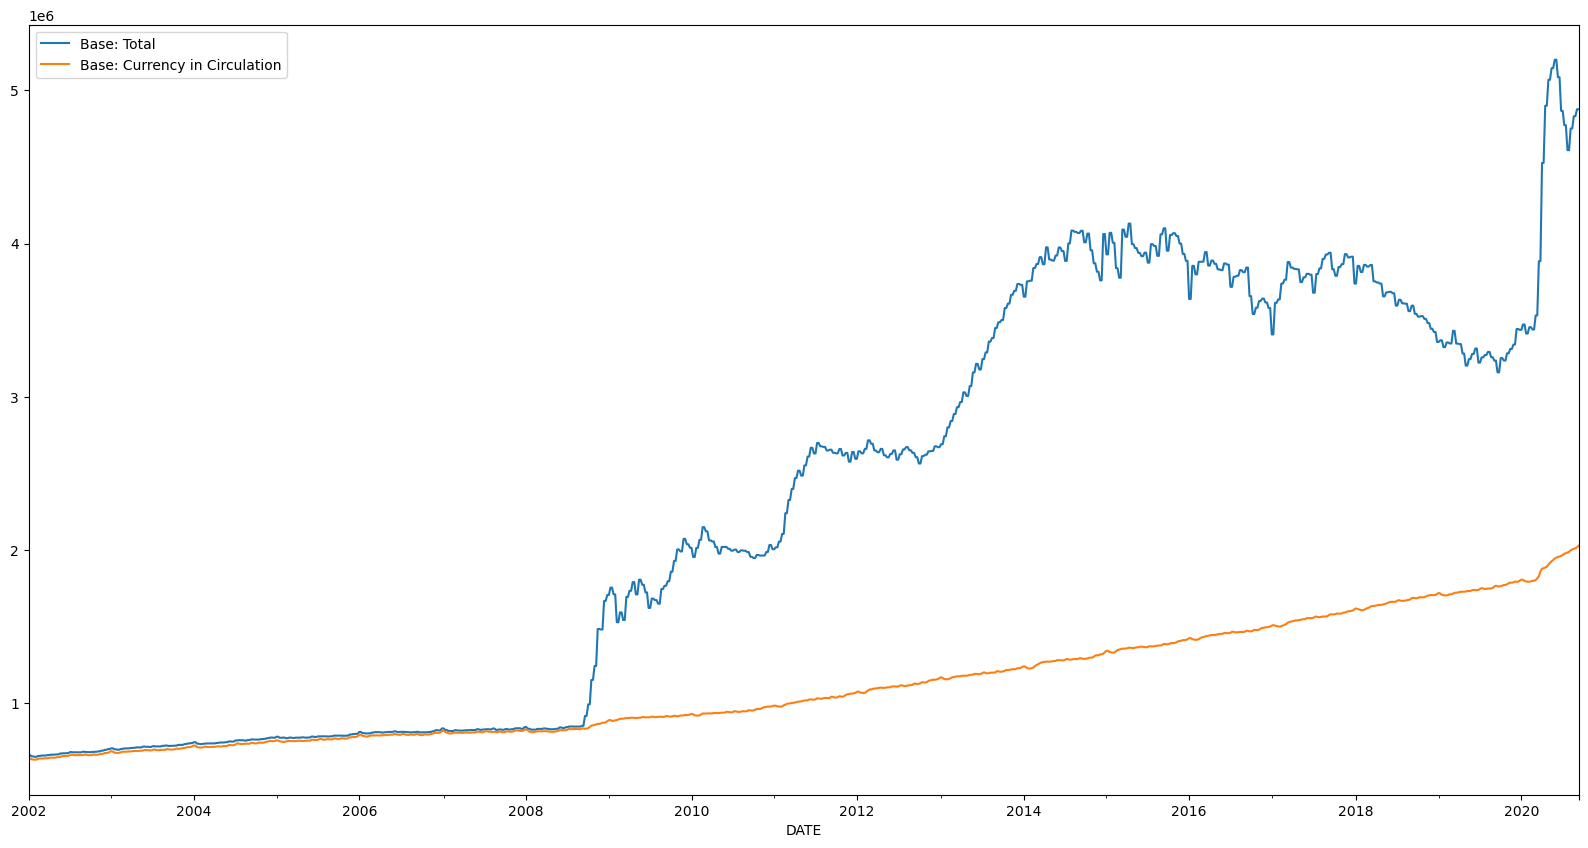

In [8]:
# identify a portion of the base vs total base
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

Text(0.5, 1.0, 'Currency in Circulation')

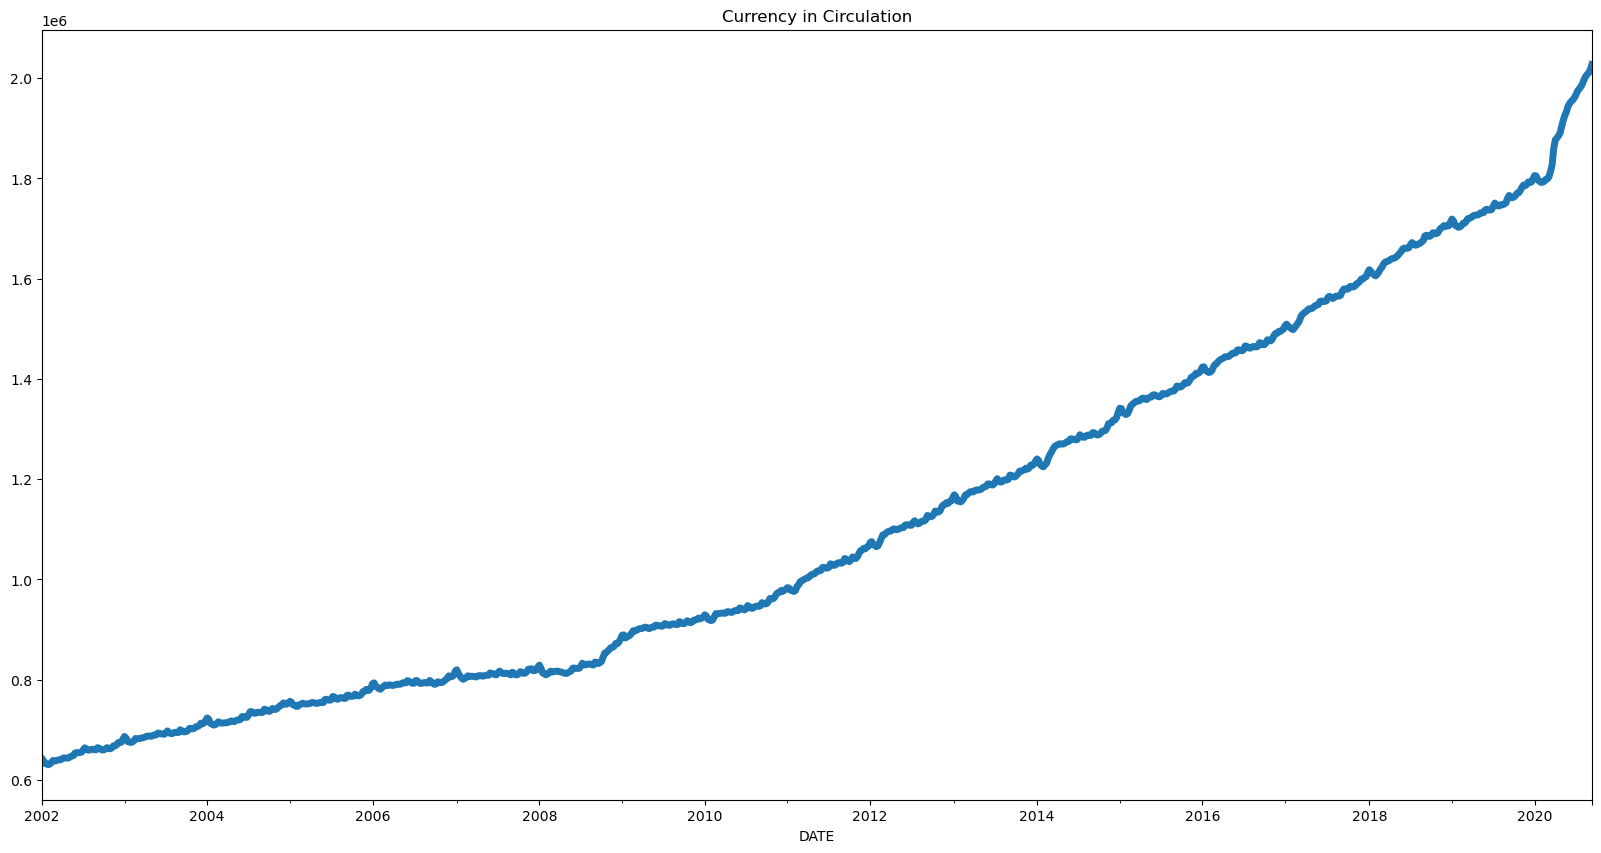

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(linewidth = 5, ax = ax)
ax.set_title("Currency in Circulation")

In [10]:
# download data and breakdown the Fed's balance sheet:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
              }
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "M")
# data = pd.read_csv("MonetaryData.csv", index_col = [0])
               

In [11]:
# save data as csv
data.to_csv("MonetaryData.csv")

# Merge two data sets, interest on reserves at Fed, with one overlapping date

In [12]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
match = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match

Interest on Reserve Balances  Interest on Excess Reserves
DATE                                                                 
2021-07-31                          0.15                         0.15

<AxesSubplot:xlabel='DATE'>

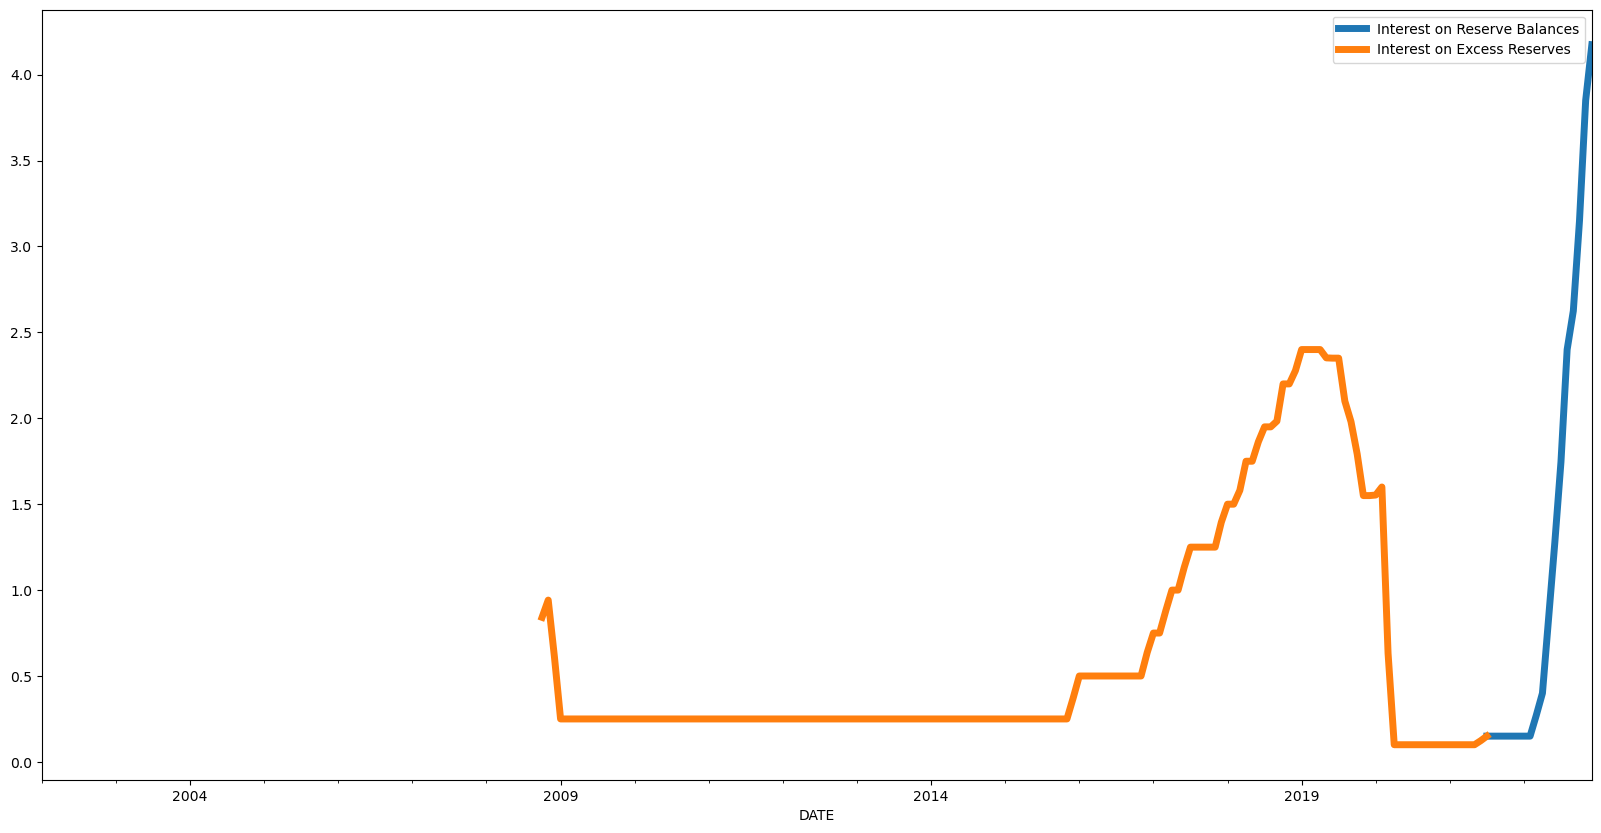

In [13]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.line(ax = ax, linewidth = 5)

In [14]:
match_date = match.index
match_val = match.sum(axis = 1) / 2
match_date, match_val

(DatetimeIndex(['2021-07-31'], dtype='datetime64[ns]', name='DATE', freq='M'),
 DATE
 2021-07-31    0.15
 Freq: M, dtype: float64)

In [15]:
# sum the interest rate data sets
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis = 1)

<AxesSubplot:xlabel='DATE'>

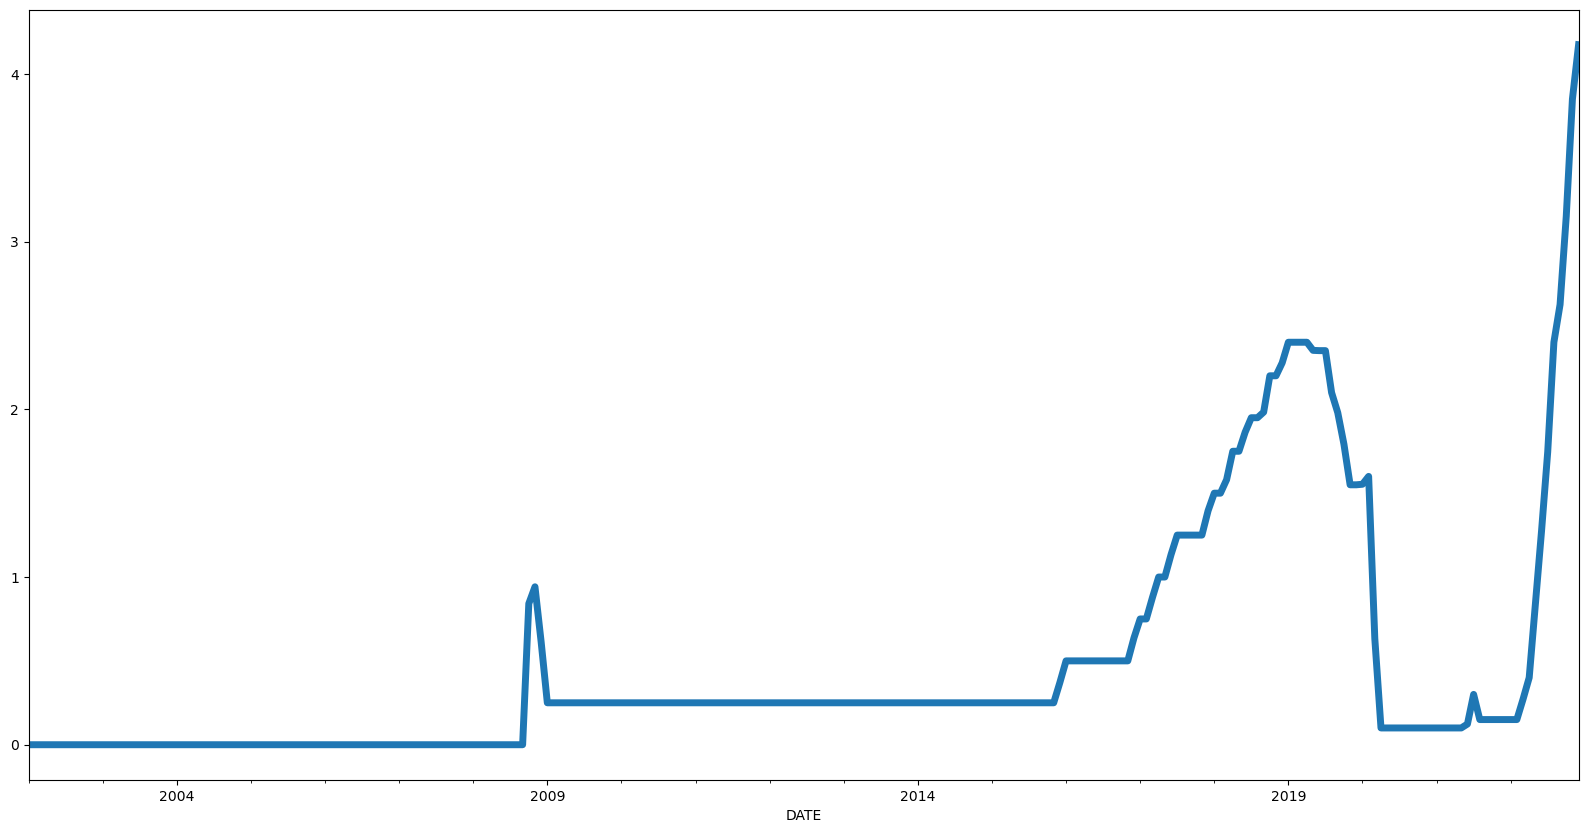

In [16]:
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(linewidth = 5, ax = ax)

#data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(
    #data["Interst on Reserve Balances"])

<AxesSubplot:xlabel='DATE'>

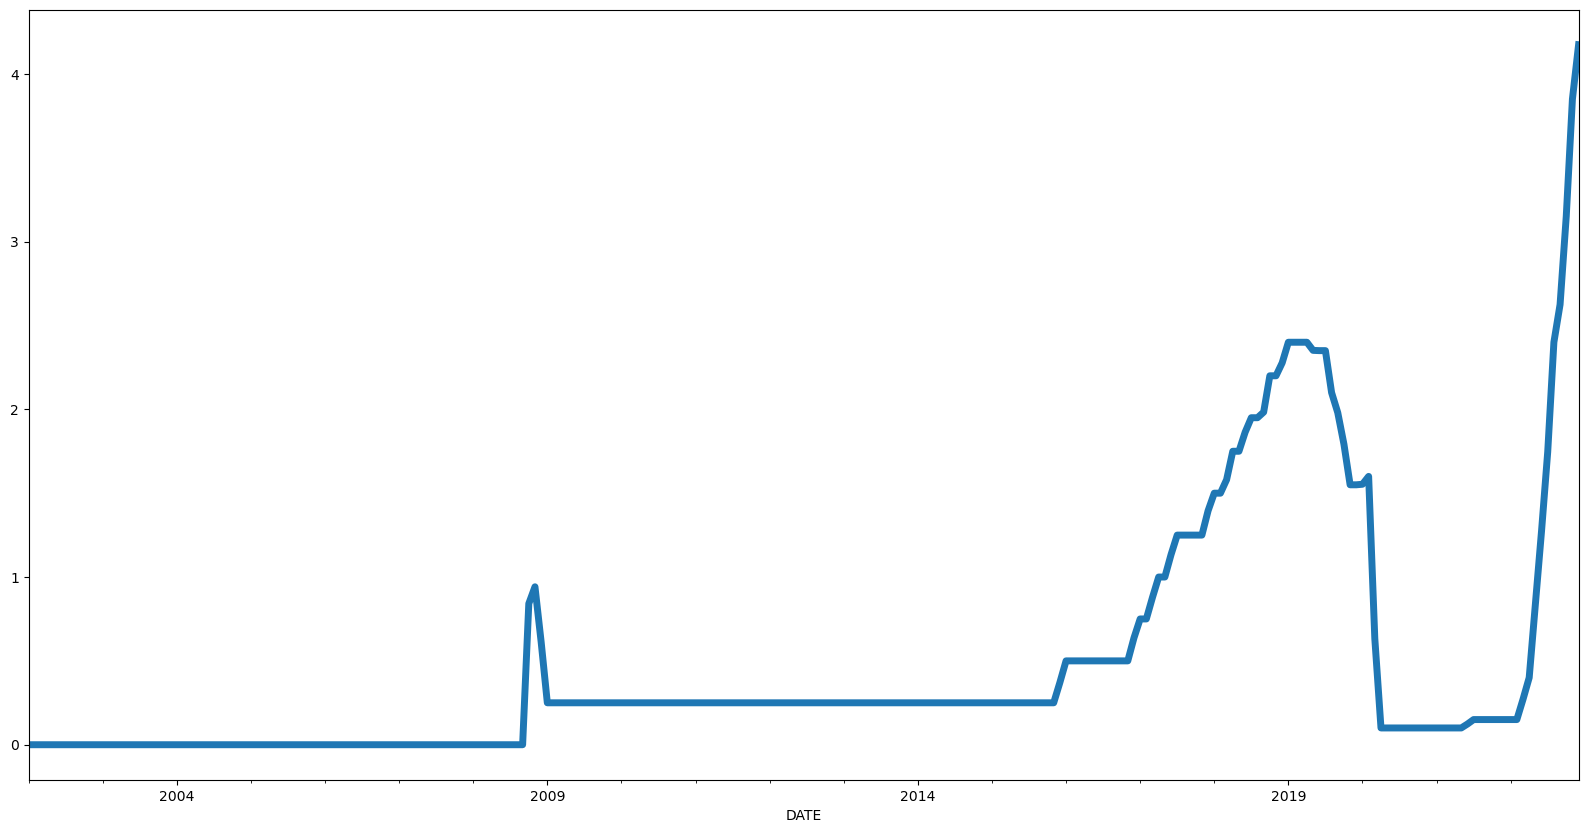

In [17]:
# get rid of overlap:
plot_data.loc[match_date]= match_val
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(linewidth = 5, ax = ax)

In [18]:
plot_data

DATE
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
                ...   
2022-08-31    2.400000
2022-09-30    2.625000
2022-10-31    3.150000
2022-11-30    3.850000
2022-12-31    4.174194
Freq: M, Length: 252, dtype: float64

In [19]:
# add the plot data to original data
data["Interest on Reserve Balances"] = plot_data
data[["Interest on Reserve Balances"]]

Interest on Reserve Balances
DATE                                    
2002-01-31                      0.000000
2002-02-28                      0.000000
2002-03-31                      0.000000
2002-04-30                      0.000000
2002-05-31                      0.000000
...                                  ...
2022-08-31                      2.400000
2022-09-30                      2.625000
2022-10-31                      3.150000
2022-11-30                      3.850000
2022-12-31                      4.174194

[252 rows x 1 columns]

# Create a function that plots lines of data in dataframe:

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_2732/1447047824.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])
/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_2732/1447047824.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])


[Text(0, -1.0, '-1.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 1.0, '1.0%'),
 Text(0, 2.0, '2.0%'),
 Text(0, 3.0, '3.0%'),
 Text(0, 4.0, '4.0%'),
 Text(0, 5.0, '5.0%'),
 Text(0, 6.0, '6.0%')]

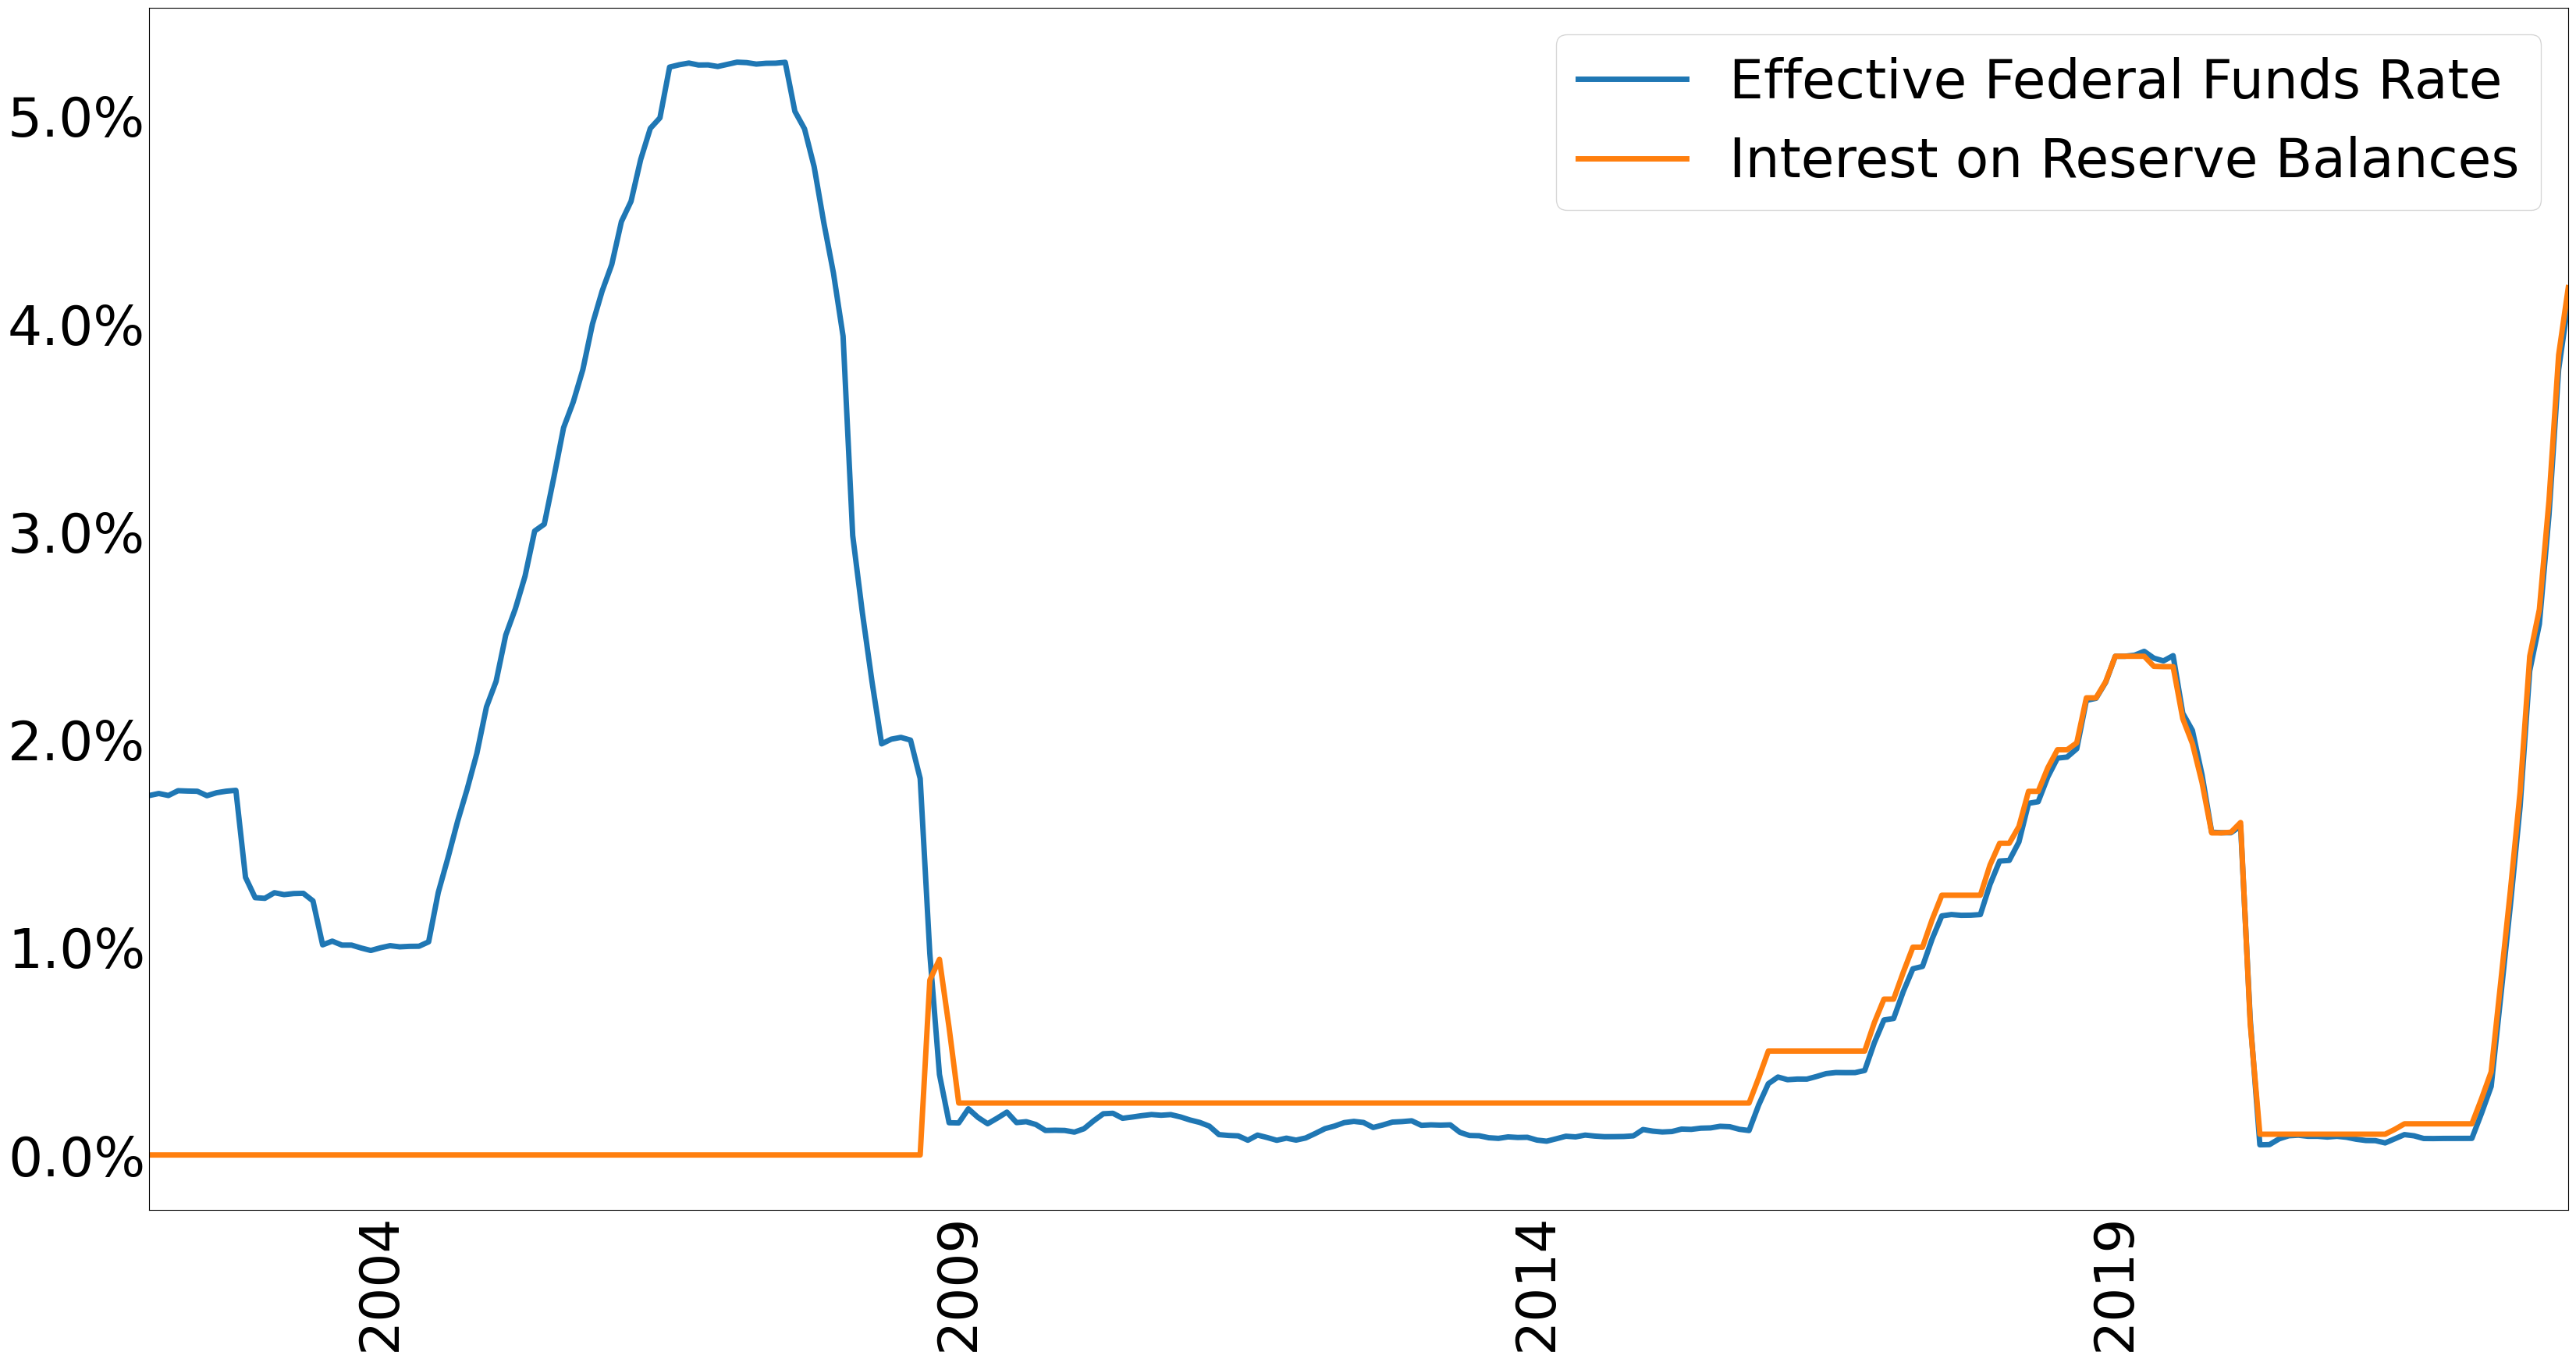

In [20]:
import os
# call a function and set parameters:
def plot_lines(df,
              linewidth = 5,
              figsize = (40,20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
               global_fontsize = 50):
    plt.rcParams.update({"font.size":global_fontsize})
    # generate a fig and ax
    fig, ax = plt.subplots(figsize = figsize)
    # drop null values:
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    # remove label "DATE"
    ax.set_xlabel("")
    # rotate tick labels
    ax.tick_params(axis = "x", rotation = 90)
    # get rid of ticklines
    ax.tick_params(length= 0, which= 'both')
    # round axis tick values
    # 1. access values
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    # save figure as file
    remove_chars = "[]:$'\\'"
    filename = str(list(df.keys()))
    # remove characters from filename
    for char in remove_chars:
        filename = filename.replace(char,"")
    if save_fig:
        folder = ("Monetary Plots")
        try:
            os.mkdir(folder)
        except:
            pass
        plt.savefig(folder + "/" + filename[:50] + " line.png",
                   bbox_inches = "tight")
    
    return fig, ax

plot_data = (data[["Effective Federal Funds Rate",
                          "Interest on Reserve Balances"]])
fig, ax = plot_lines(plot_data, save_fig = True)
ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])
    

# Monetary Base

The total monetary base can be described in terms of its support of lending within the economy.  The remainder of the base is held at the Federal Reserve without supporting additional lending. We will plot the total quantity of base money, and then break down this amount between base money that is and is not deposited at the Federal Reserve. We will observe that a radical change in monetary policy in 2008 led to an unprecedented increase in the portion of the base deposited at the Federal Reserve. 

In [21]:
# Change these from billions to millions
bill_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                   "Balance Sheet: Other Deposits ($ Mil)",
                   "Base: Currency in Circulation ($ Mil)"]
for key in bill_to_mil_list:
    data[key] = data[key].mul(10 ** 3)

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_2732/1447047824.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:>)

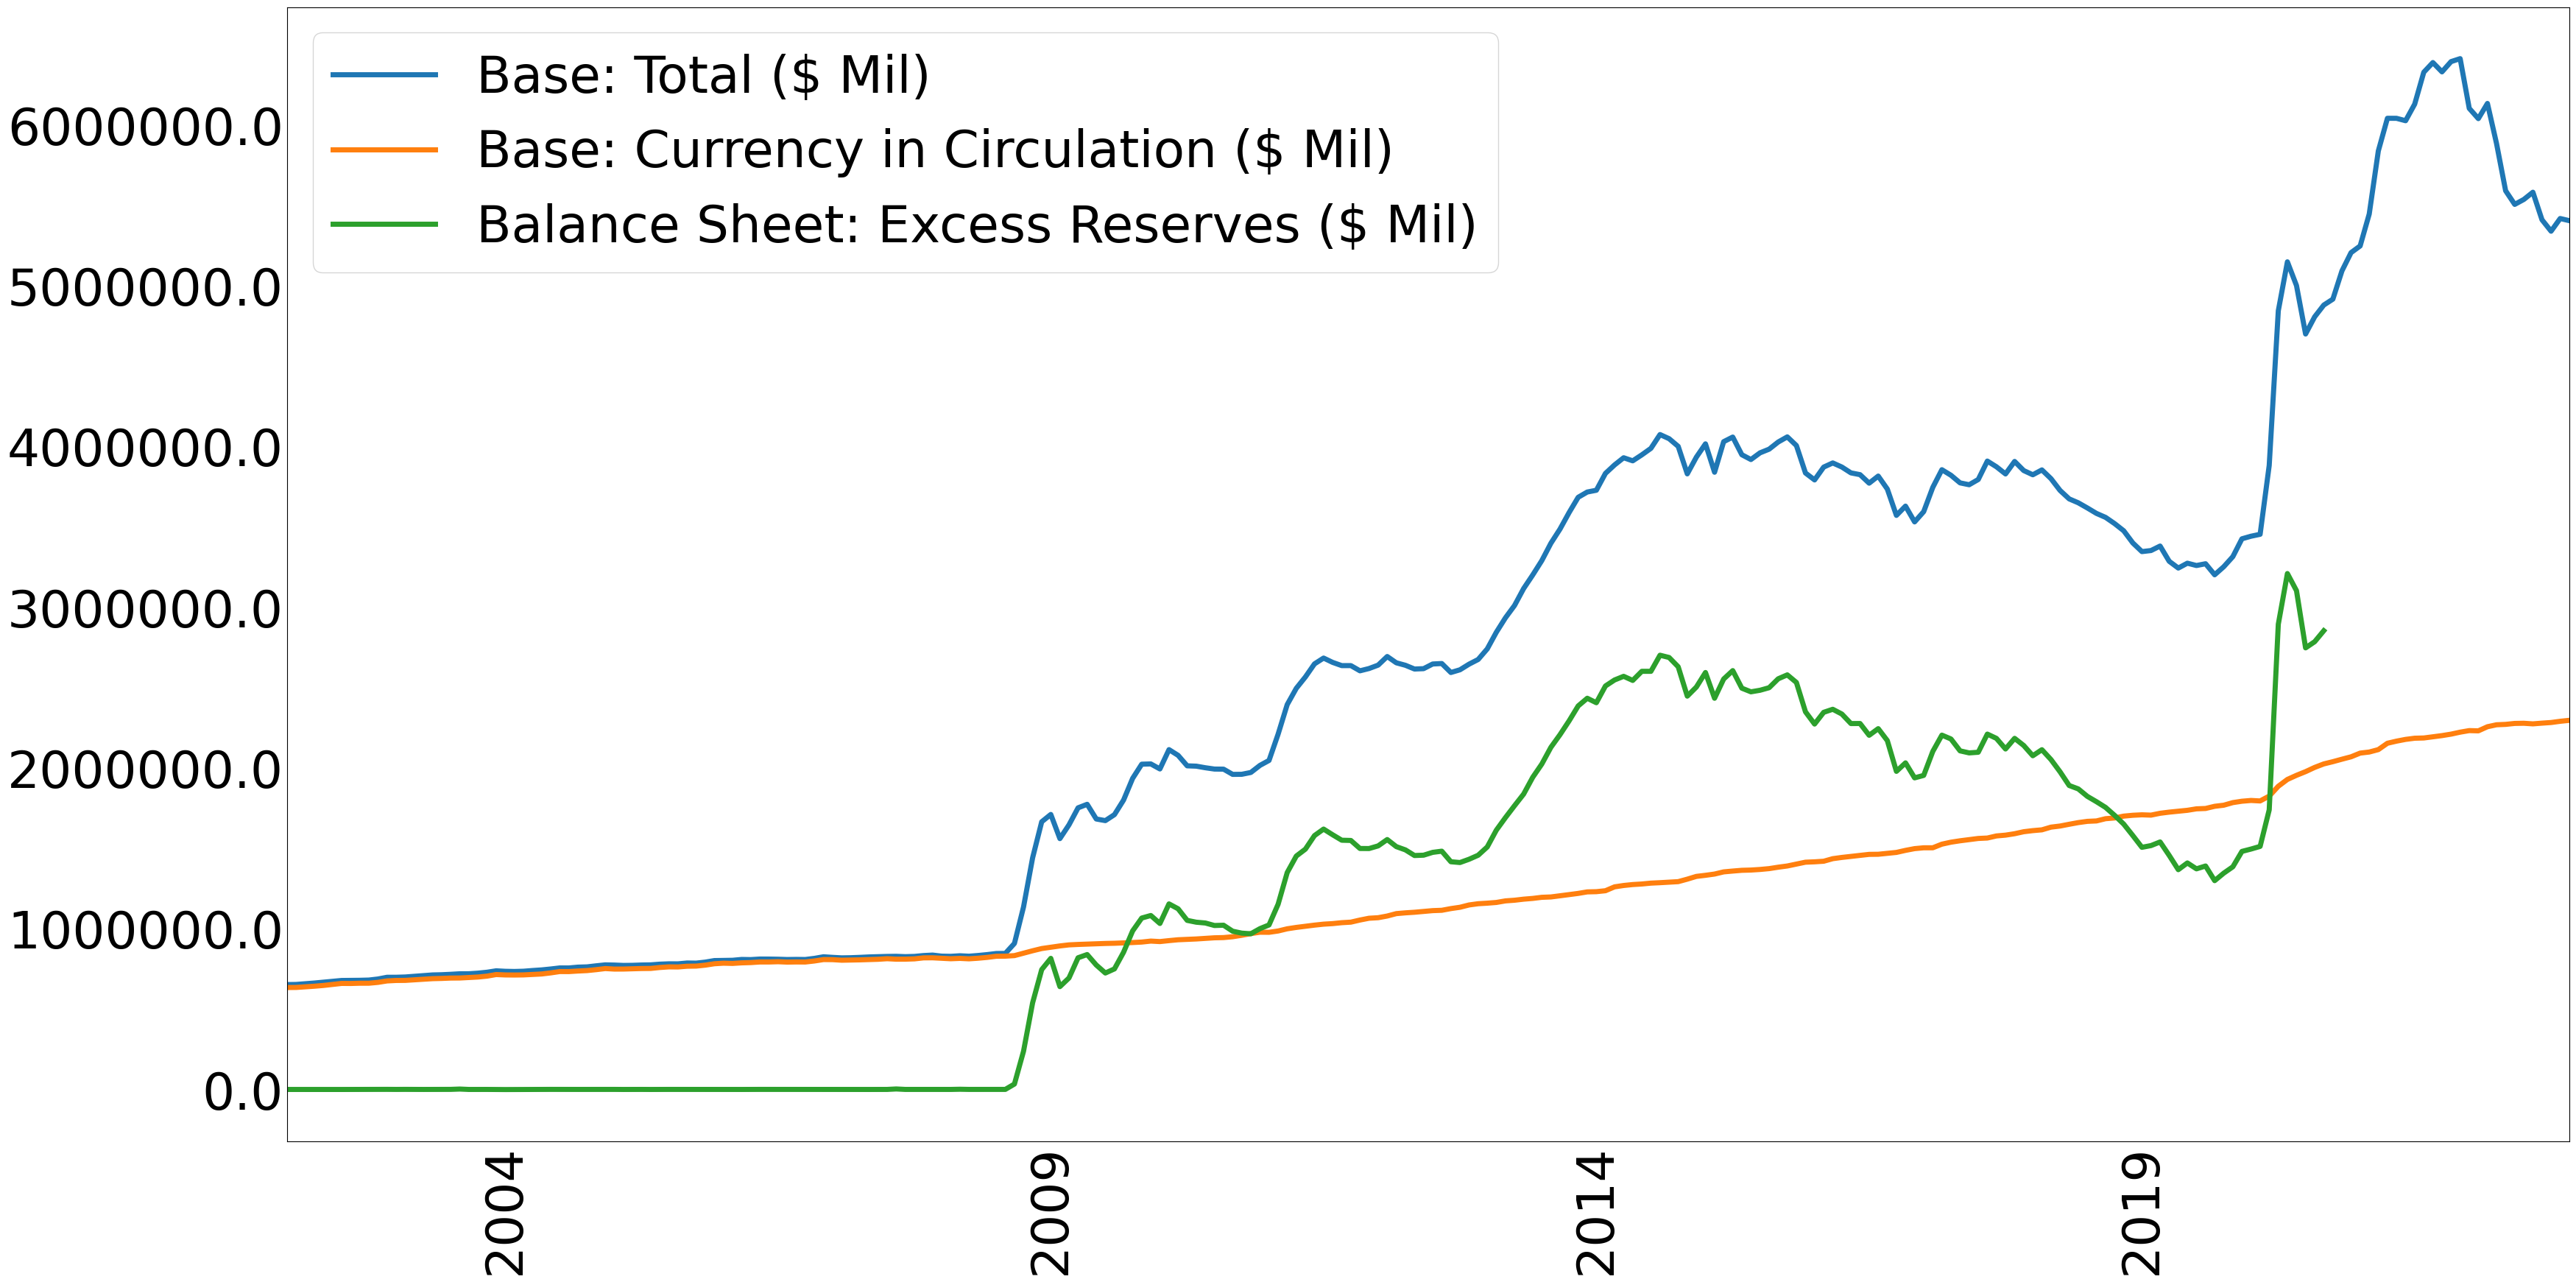

In [22]:
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]
plot_lines(df = plot_data, linewidth = 5, figsize = (40, 20), pp = None)

# Stacked lines

It would be useful if we could view these components as portions of the total stock of base money. To accomplish this, we need to create a new function in plots. This function will stack the values plotted instead of plotting the values independent of one another.

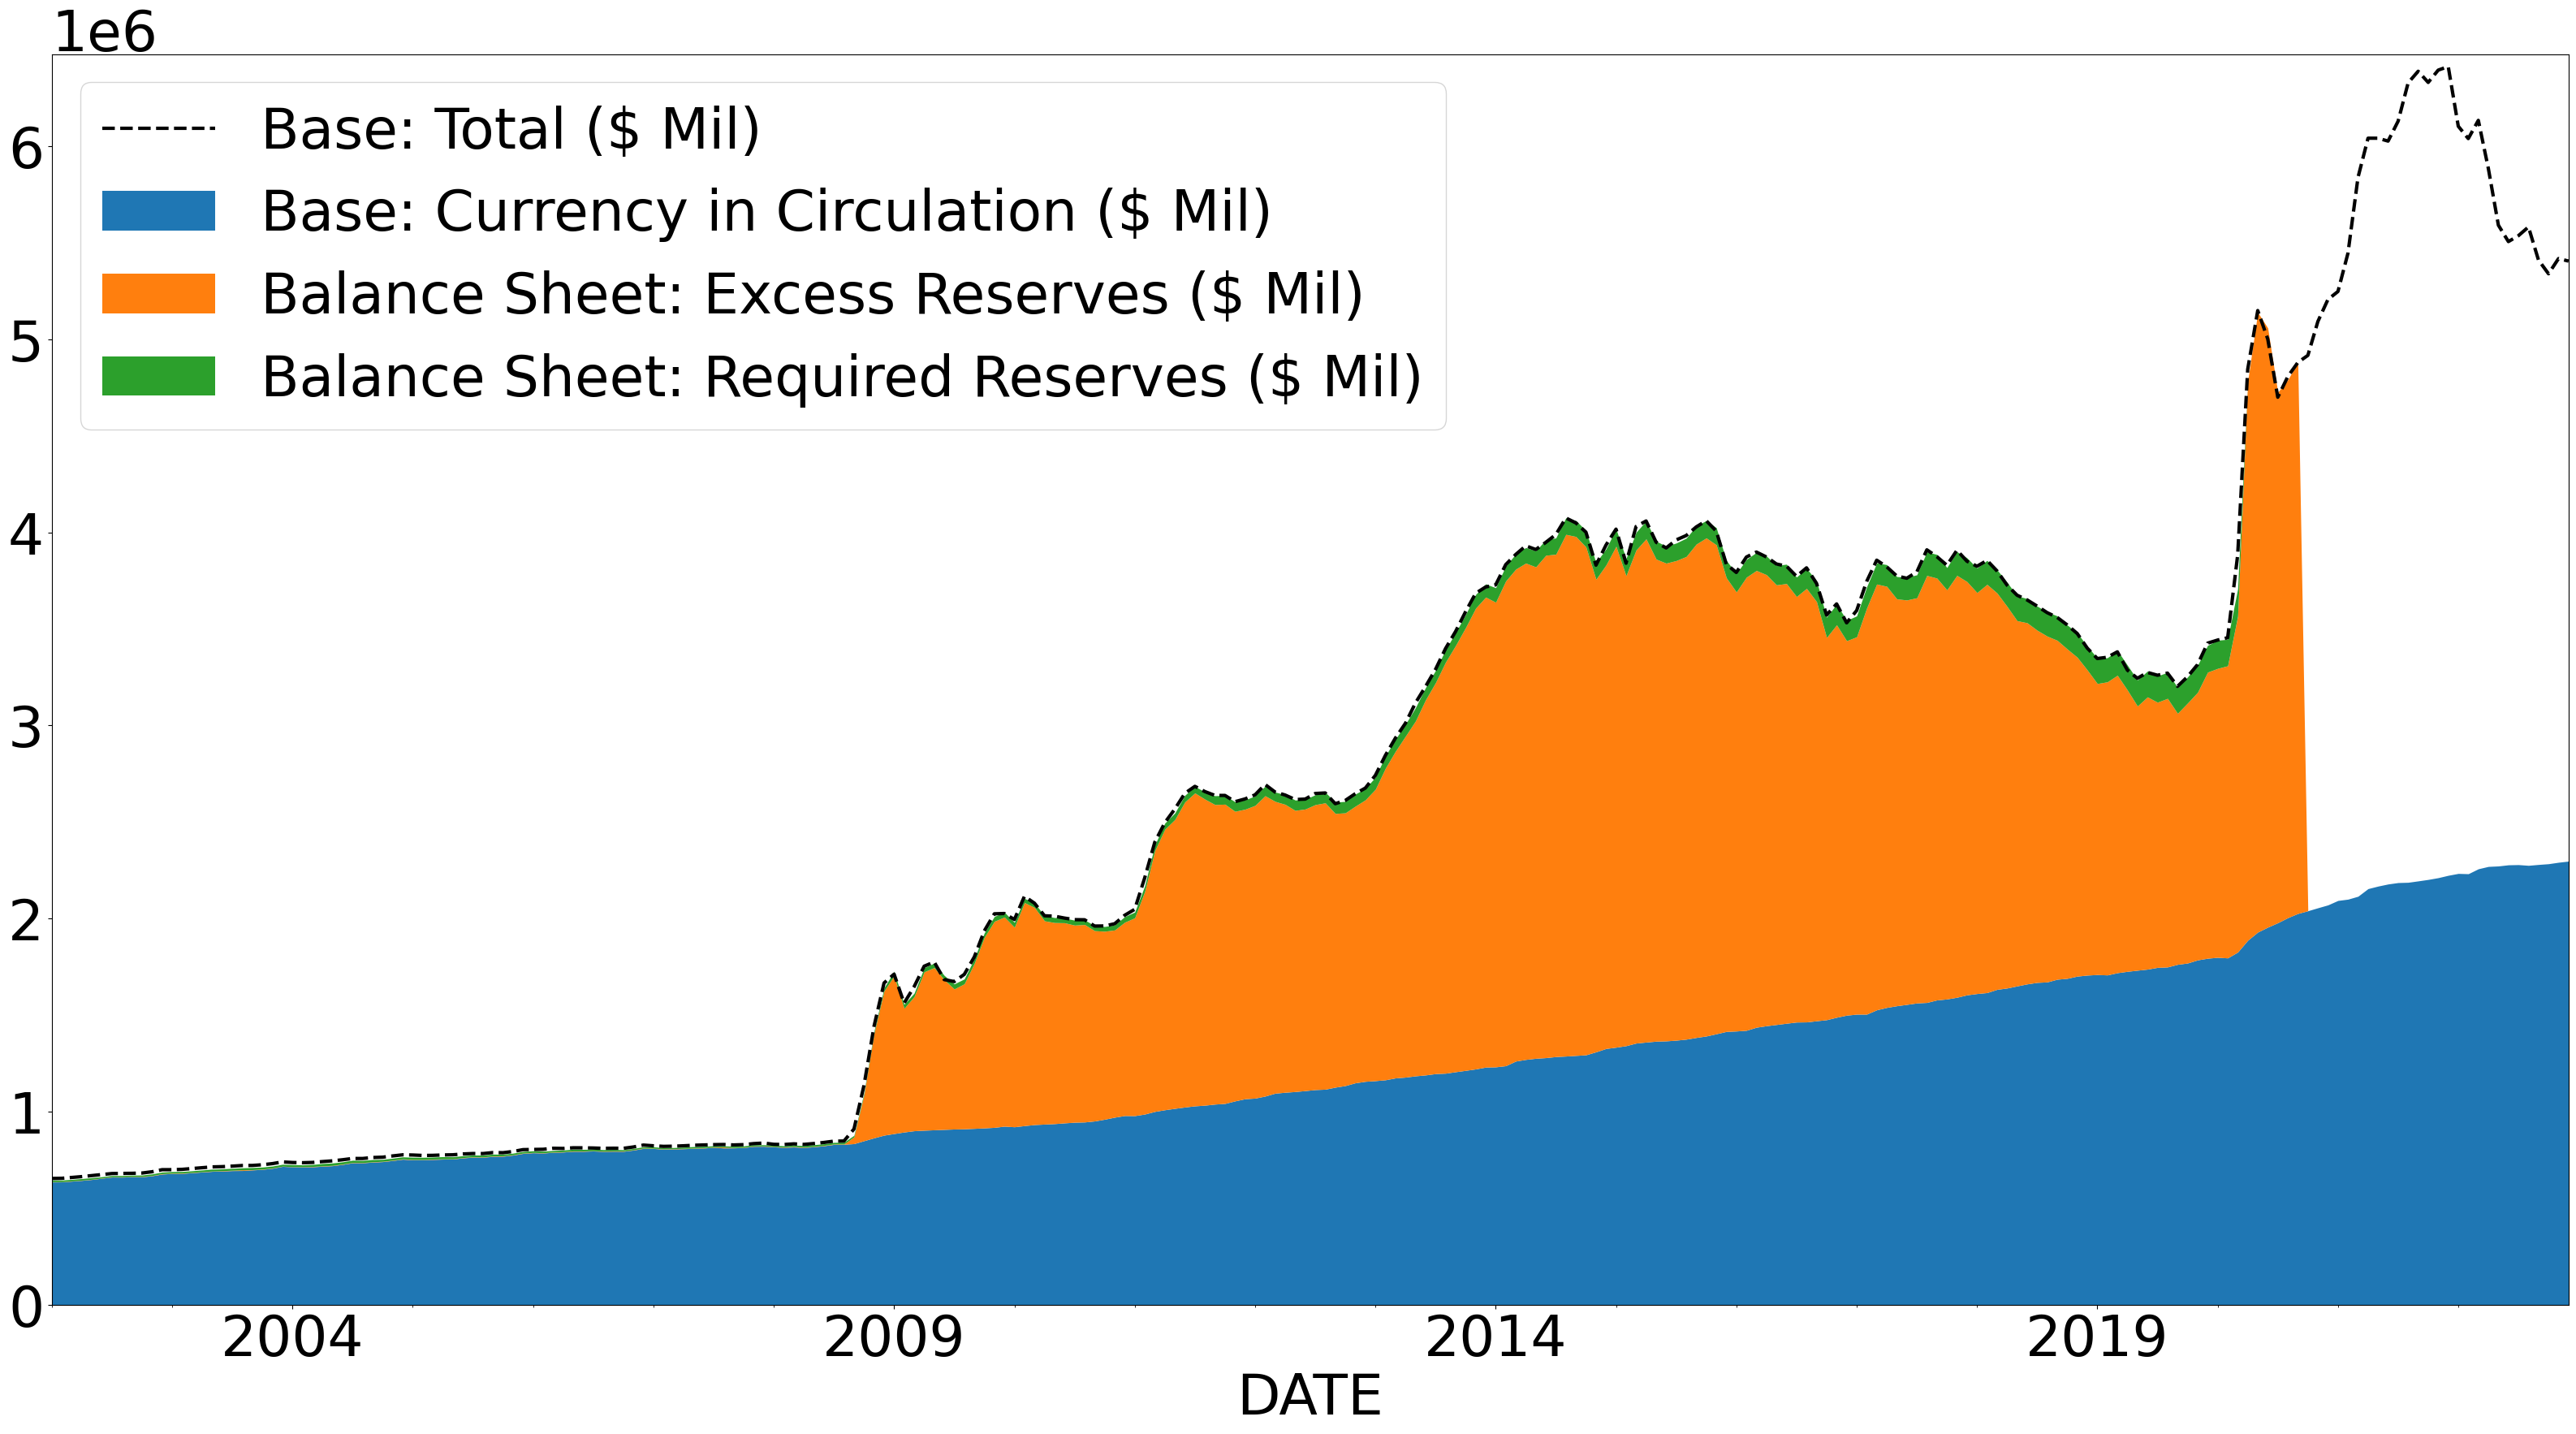

In [26]:
# make a function that plots stacked areas:
def plot_stacked(df,
                stack_vars,
                linewidth = 3,
                figsize = (40,20),
                 total_var = False,
                 global_fontsize = 50,
                 ncol = 1
                ):
    # reset global values for size of margin (white space)
    plt.rcParams['axes.ymargin'] = 0.01
    plt.rcParams['axes.xmargin'] = 0.00
    # reset global values for font
    plt.rcParams.update({"font.size":global_fontsize}) # set global font size
    fig, ax = plt.subplots(figsize = figsize)
    if total_var != False: 
        df[total_var].plot.line(
            linewidth = linewidth,
            ax = ax,
            c = "k",
            label = total_var,
            ls = "--")
    ax.legend(loc = 2, ncol = ncol)
    plt.xticks(rotation = 90)
        # bbox_to_anchor = (0,1)
    # create the area plots: 
    area_df = df[stack_vars]
    area_df.plot.area(stacked = True,
                  linewidth = 0,
                  ax = ax)
    
        
    return fig, ax

stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(df = data, stack_vars = stack_vars, total_var = total_var)

We can see that the monetary base is almost entirely divided between currency in circulation and money deposited on account as excess reserves at the Fed. The missing portion of the base in this graph is the quantity of required reserves held at the Federal Reserve. This excludes the value of required reserves held as vault cash.

In [24]:
# an option:
# money_vars.append()
money_vars = money_vars + ["Balance Sheet: Required Reserves ($ Mil)"]
money_vars

['Base: Total ($ Mil)',
 'Base: Currency in Circulation ($ Mil)',
 'Balance Sheet: Excess Reserves ($ Mil)',
 'Balance Sheet: Required Reserves ($ Mil)']

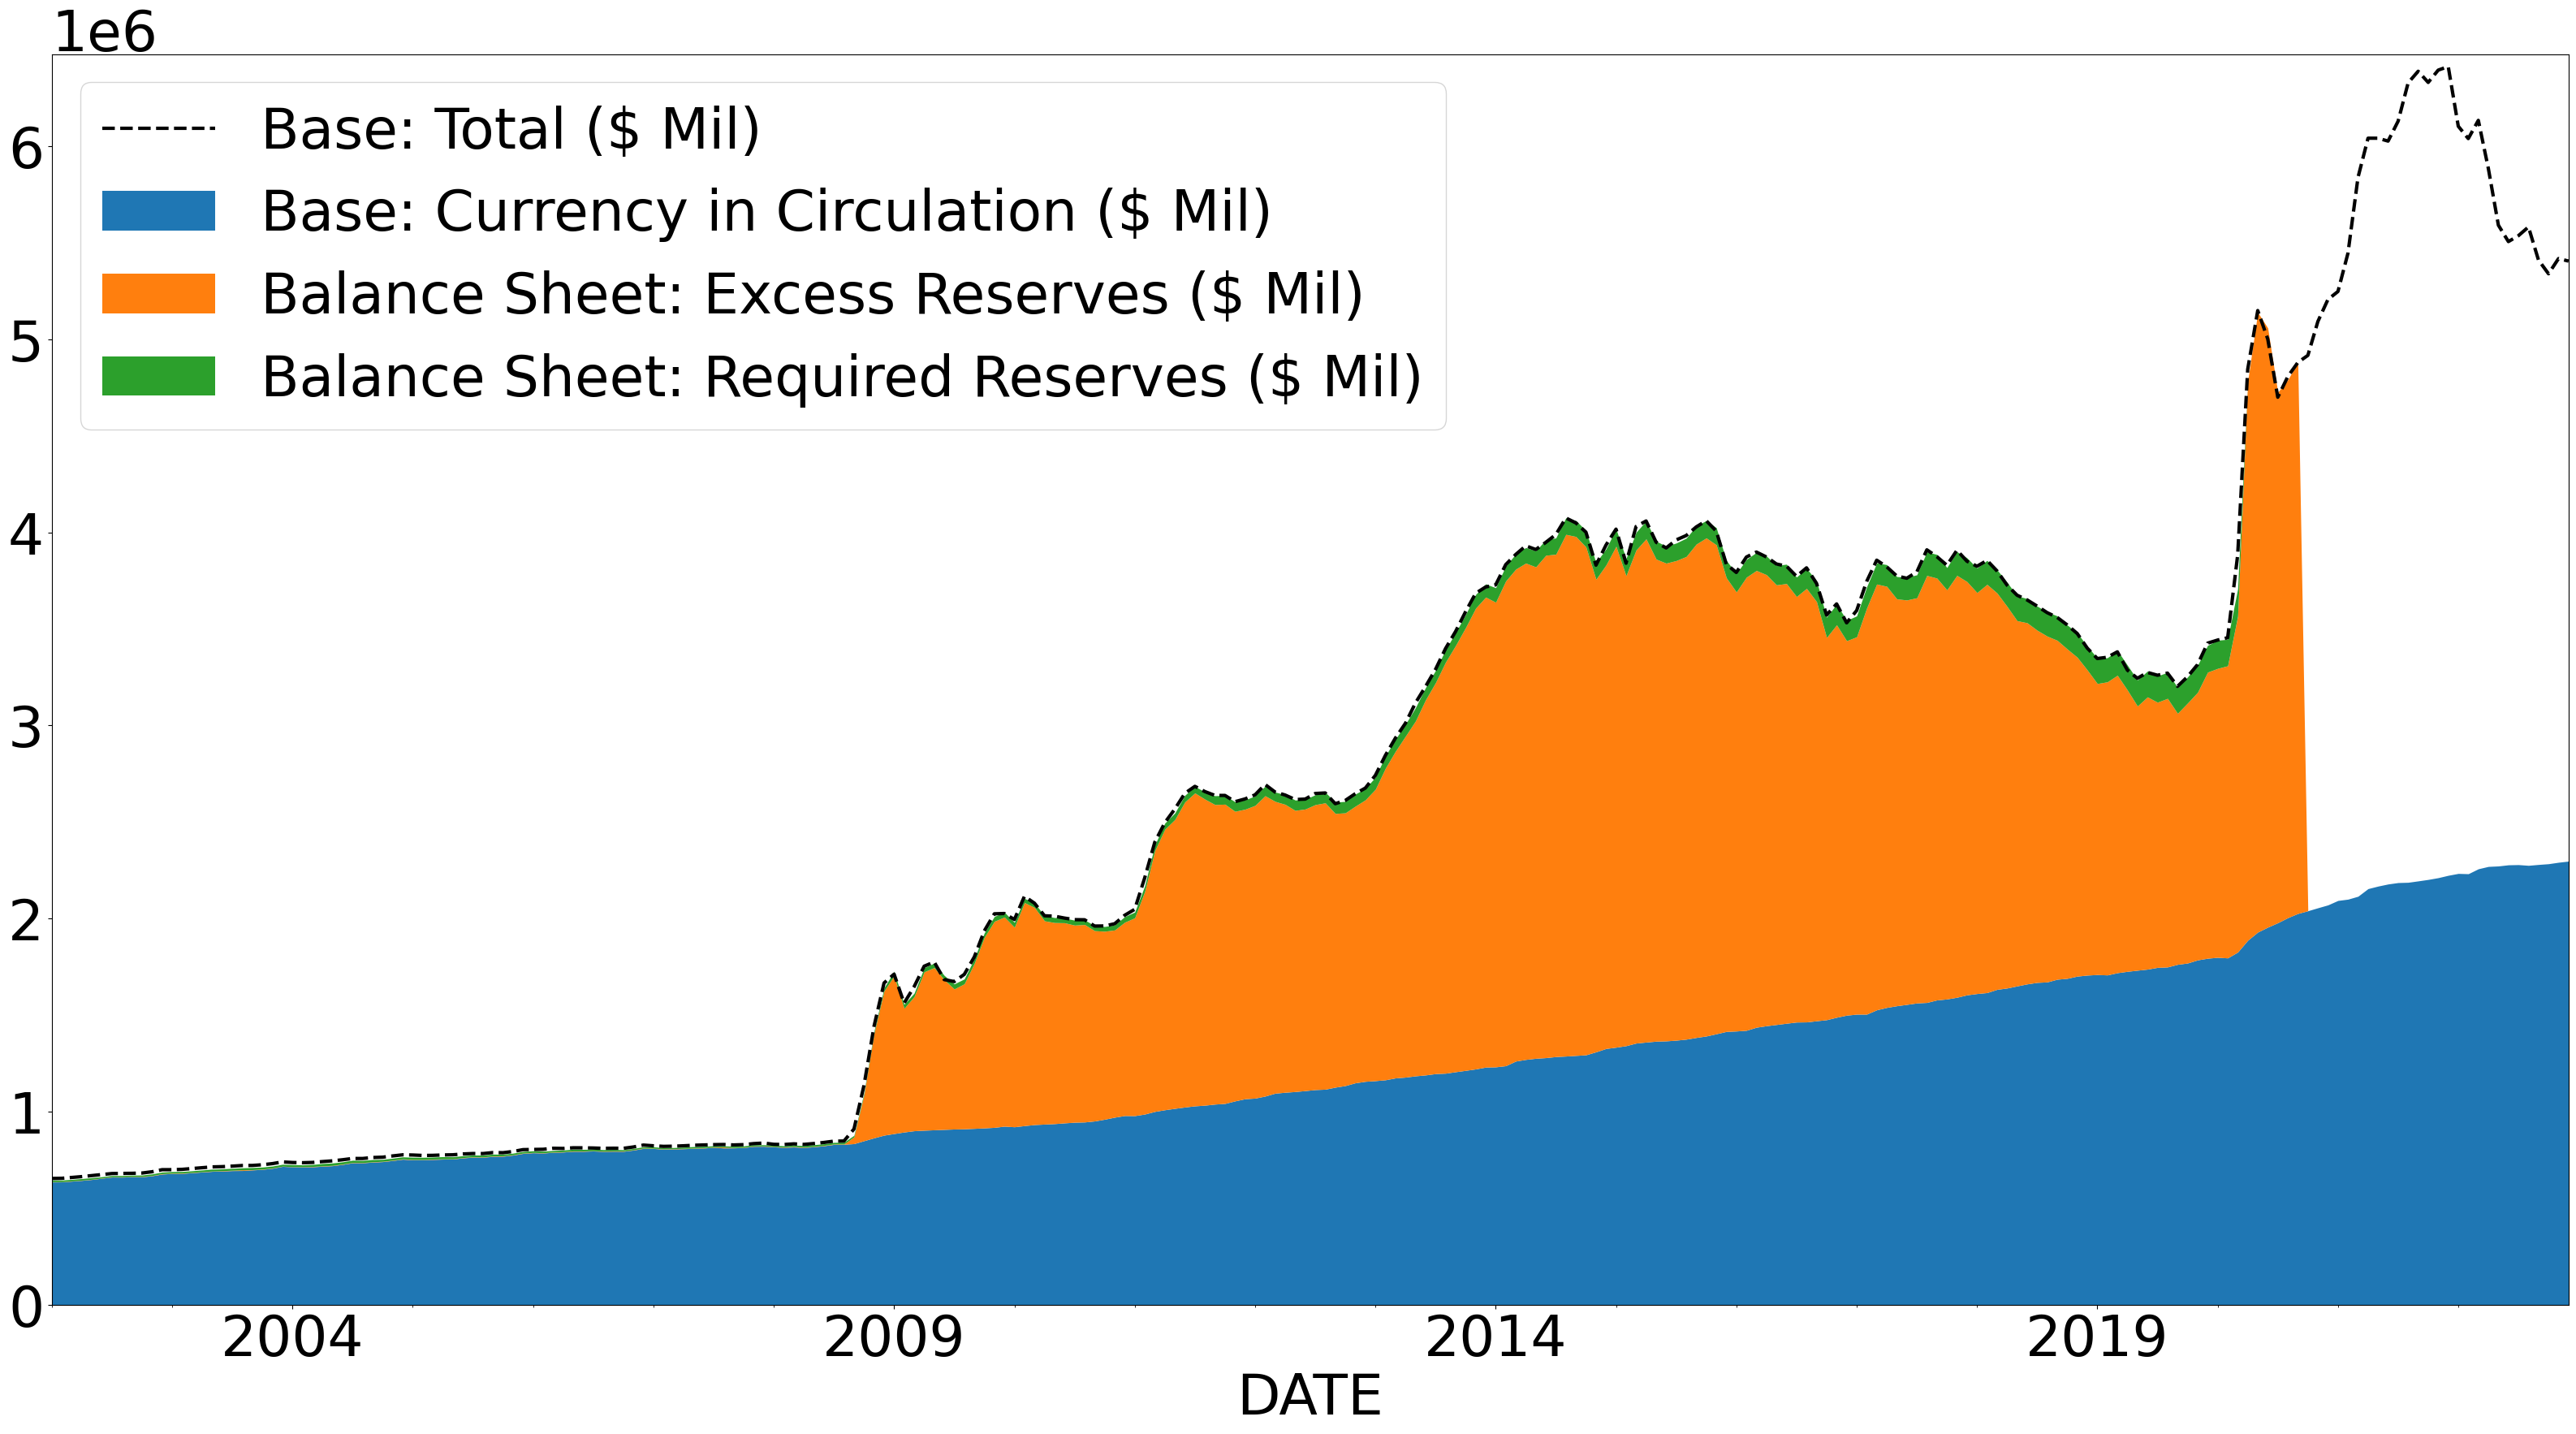

In [27]:
stack_vars = money_vars[1:]
fig, ax = plot_stacked(df = data, 
                       stack_vars = stack_vars, 
                       total_var = total_var)

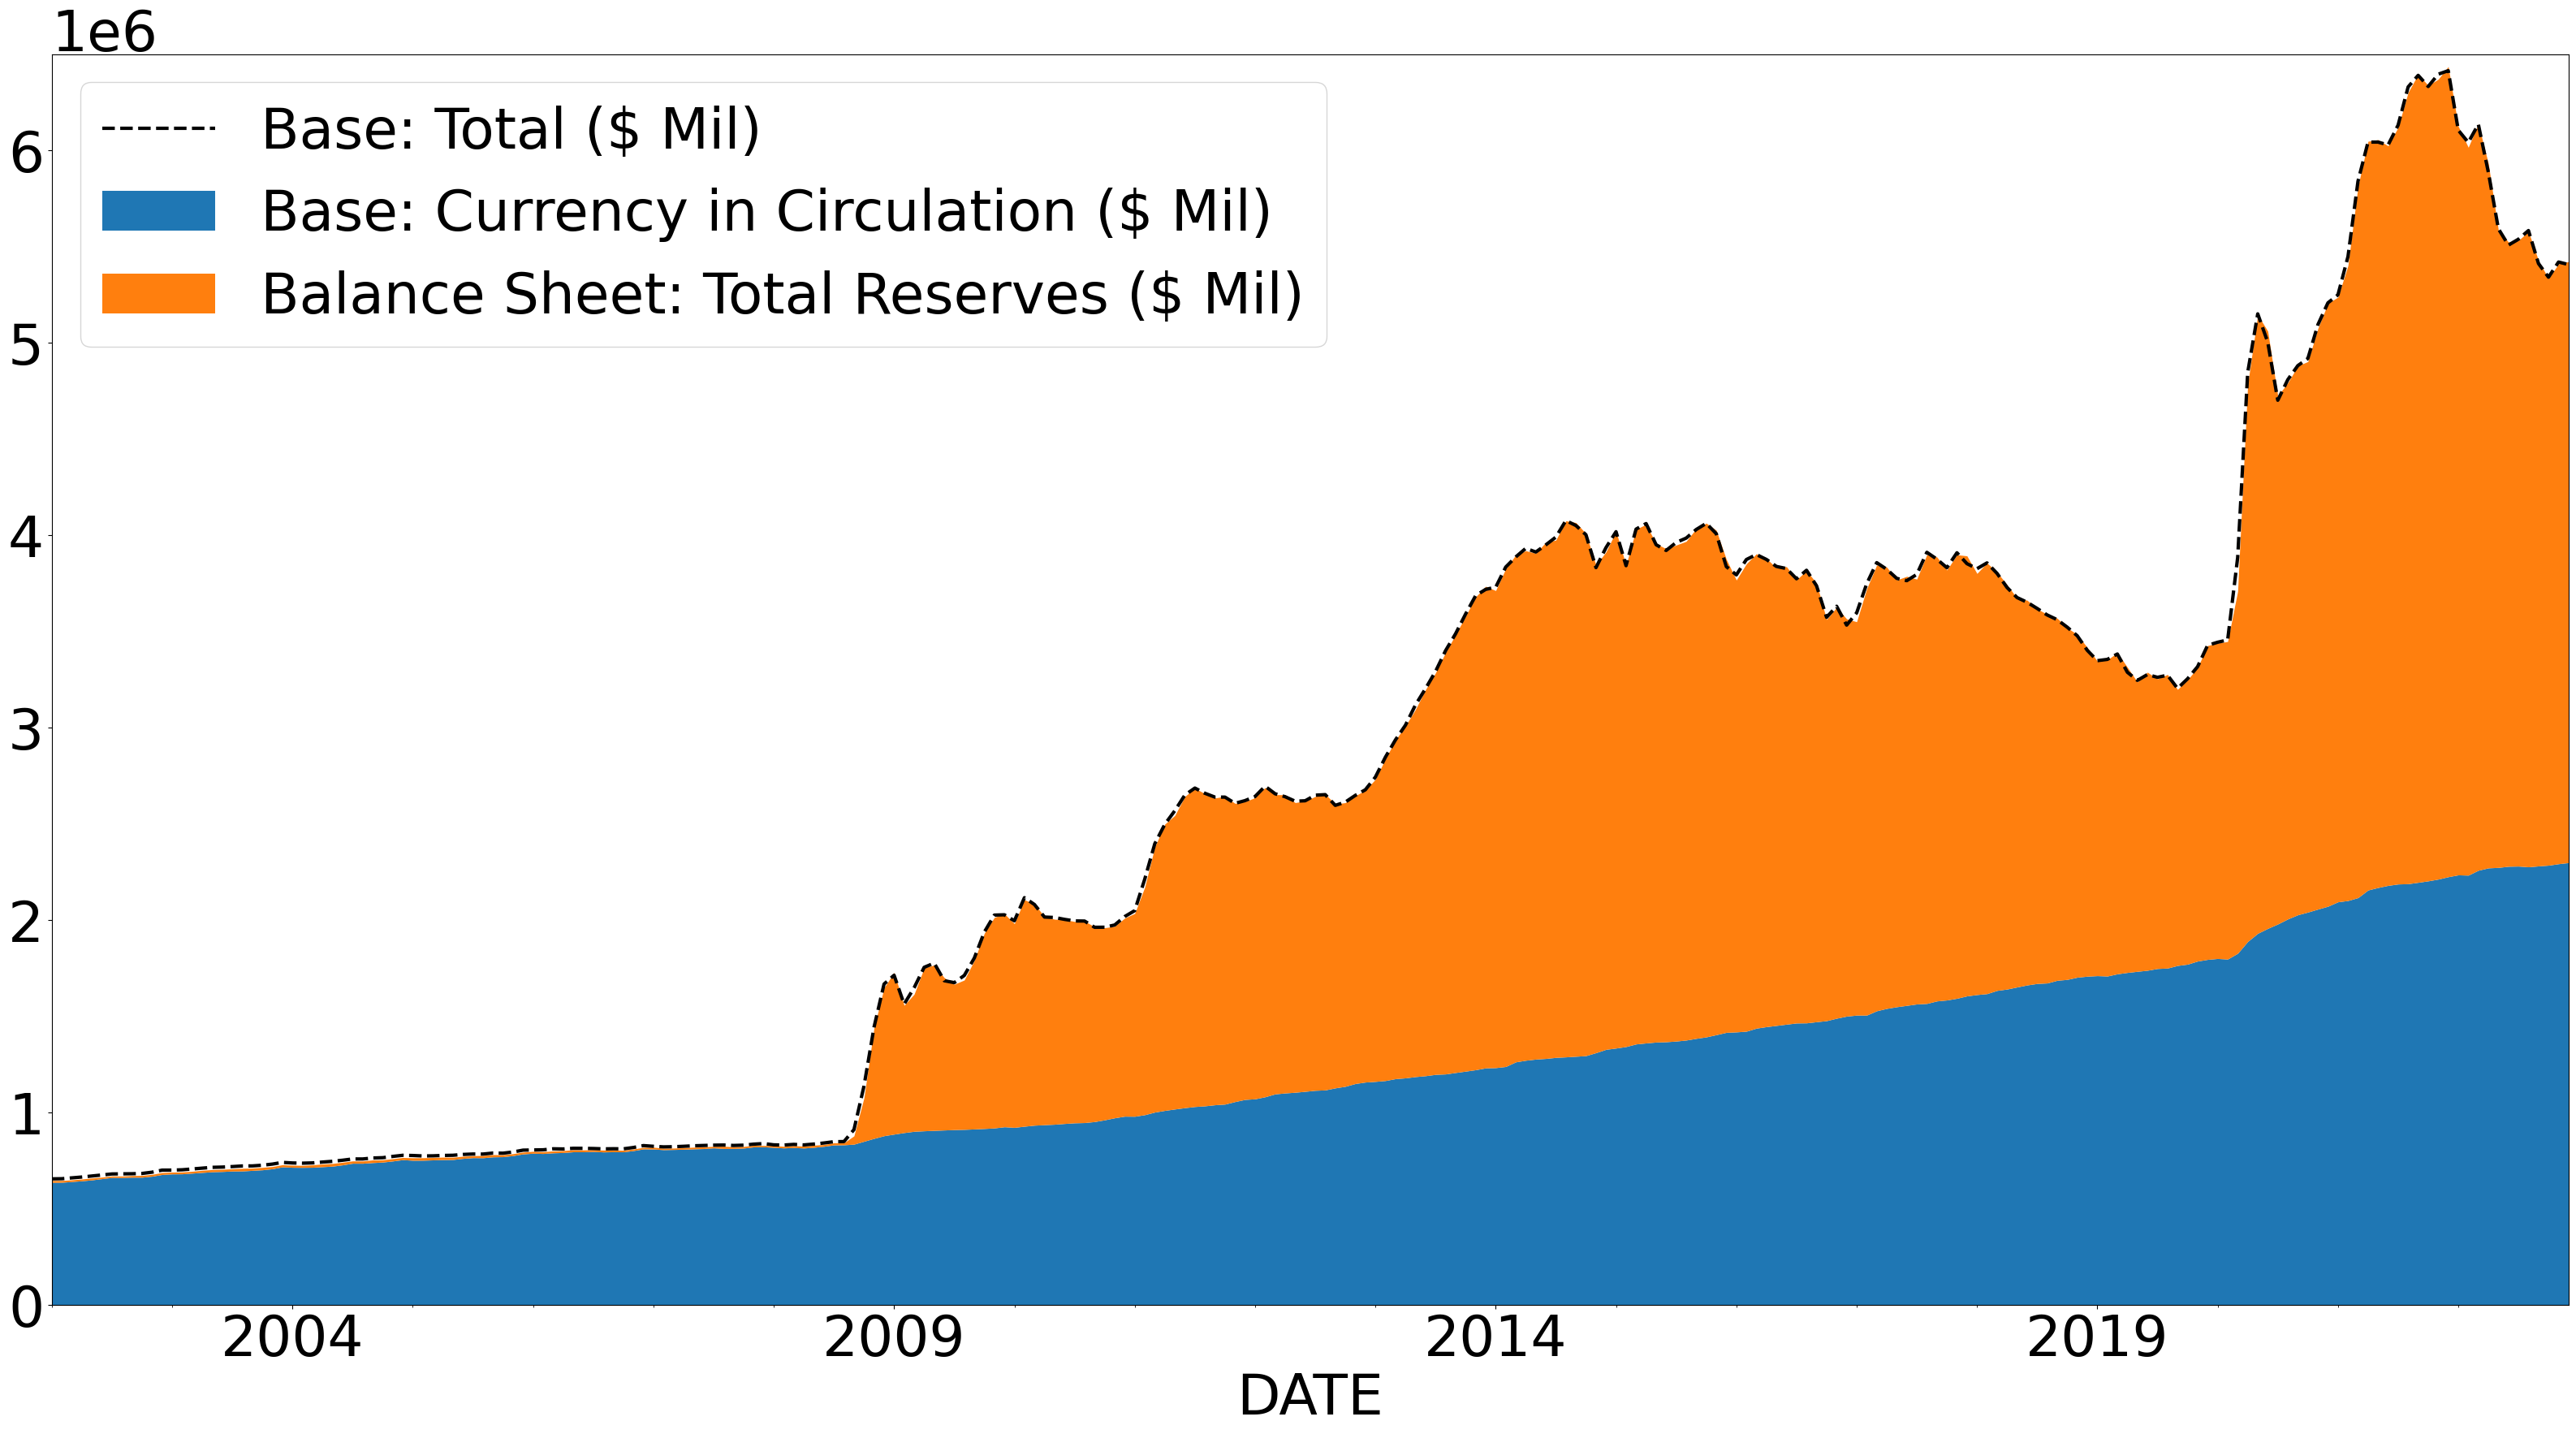

In [28]:
stack_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
fig, ax = plot_stacked(df = data, 
                       stack_vars = stack_vars, 
                       total_var = total_var)

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_2732/1447047824.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


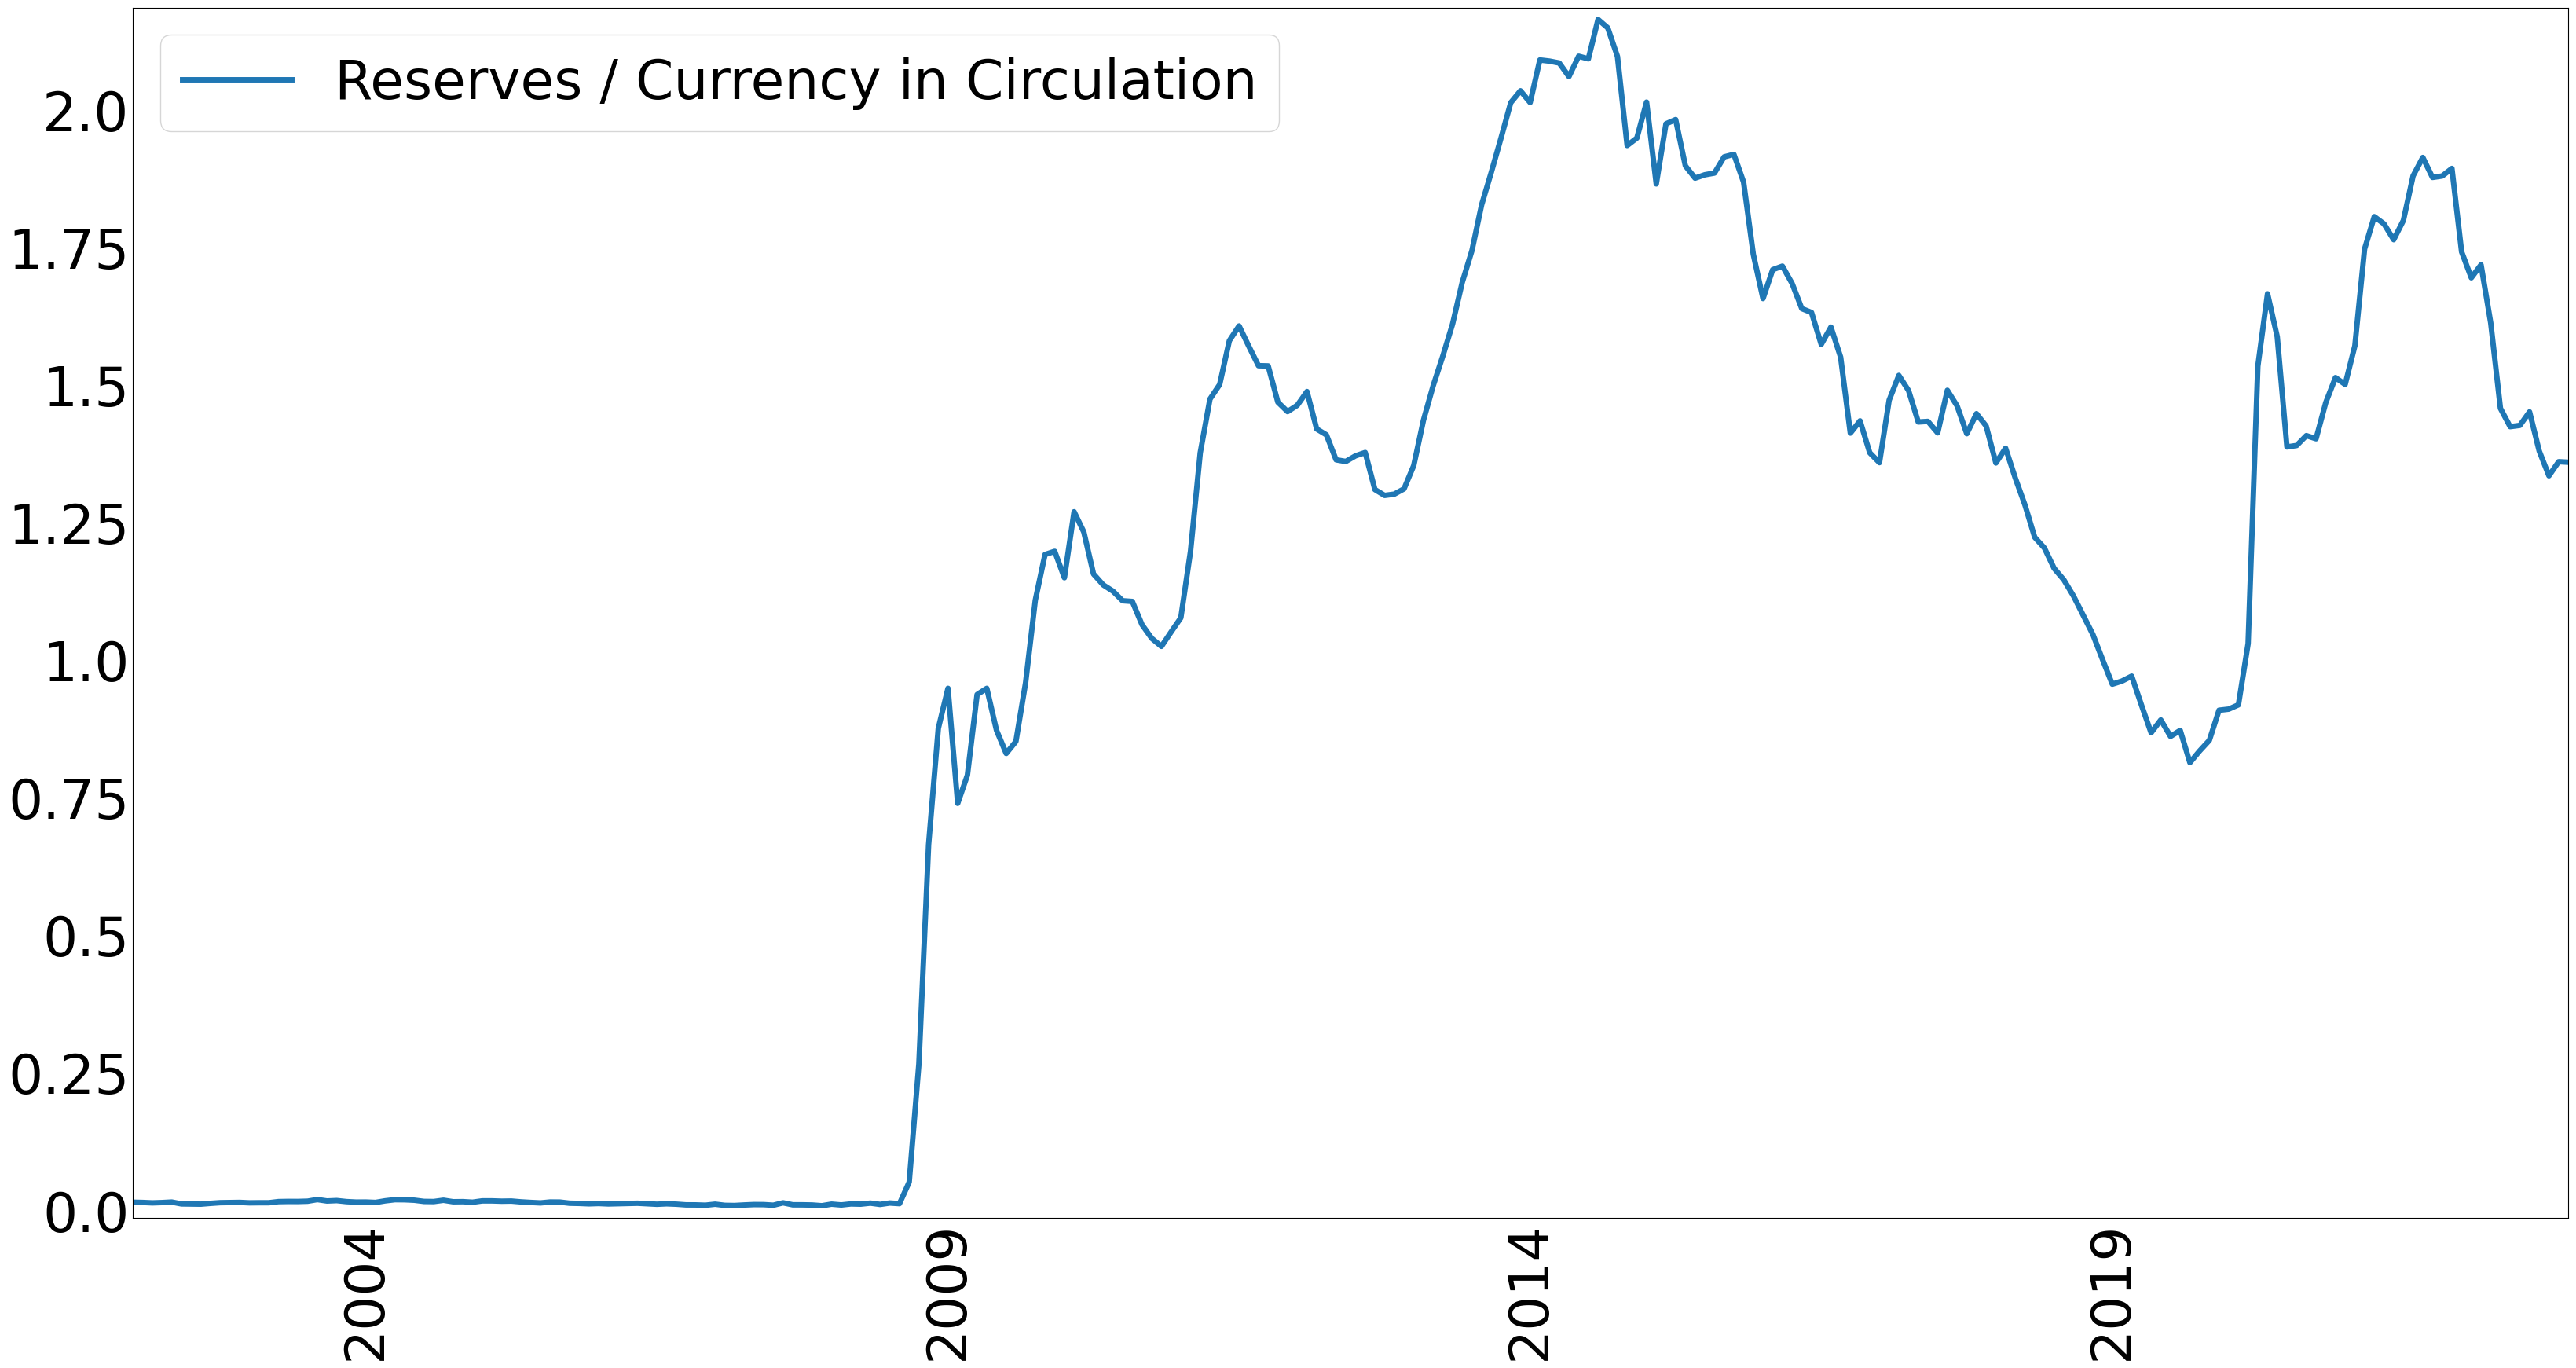

In [30]:
# Gives us a ratio of the reserves of Fed compared to currency in circulation
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])
reserve_vars = ["Reserves / Currency in Circulation"]
plot_df = data[reserve_vars]
fig, ax = plot_lines(plot_df)

Reserves held as vault cash are held by banks themselves. They do not receive interest. Let's represent this distinction between reserves at the Federal Reserve and reserves held as vault cash.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:xlabel='DATE'>)

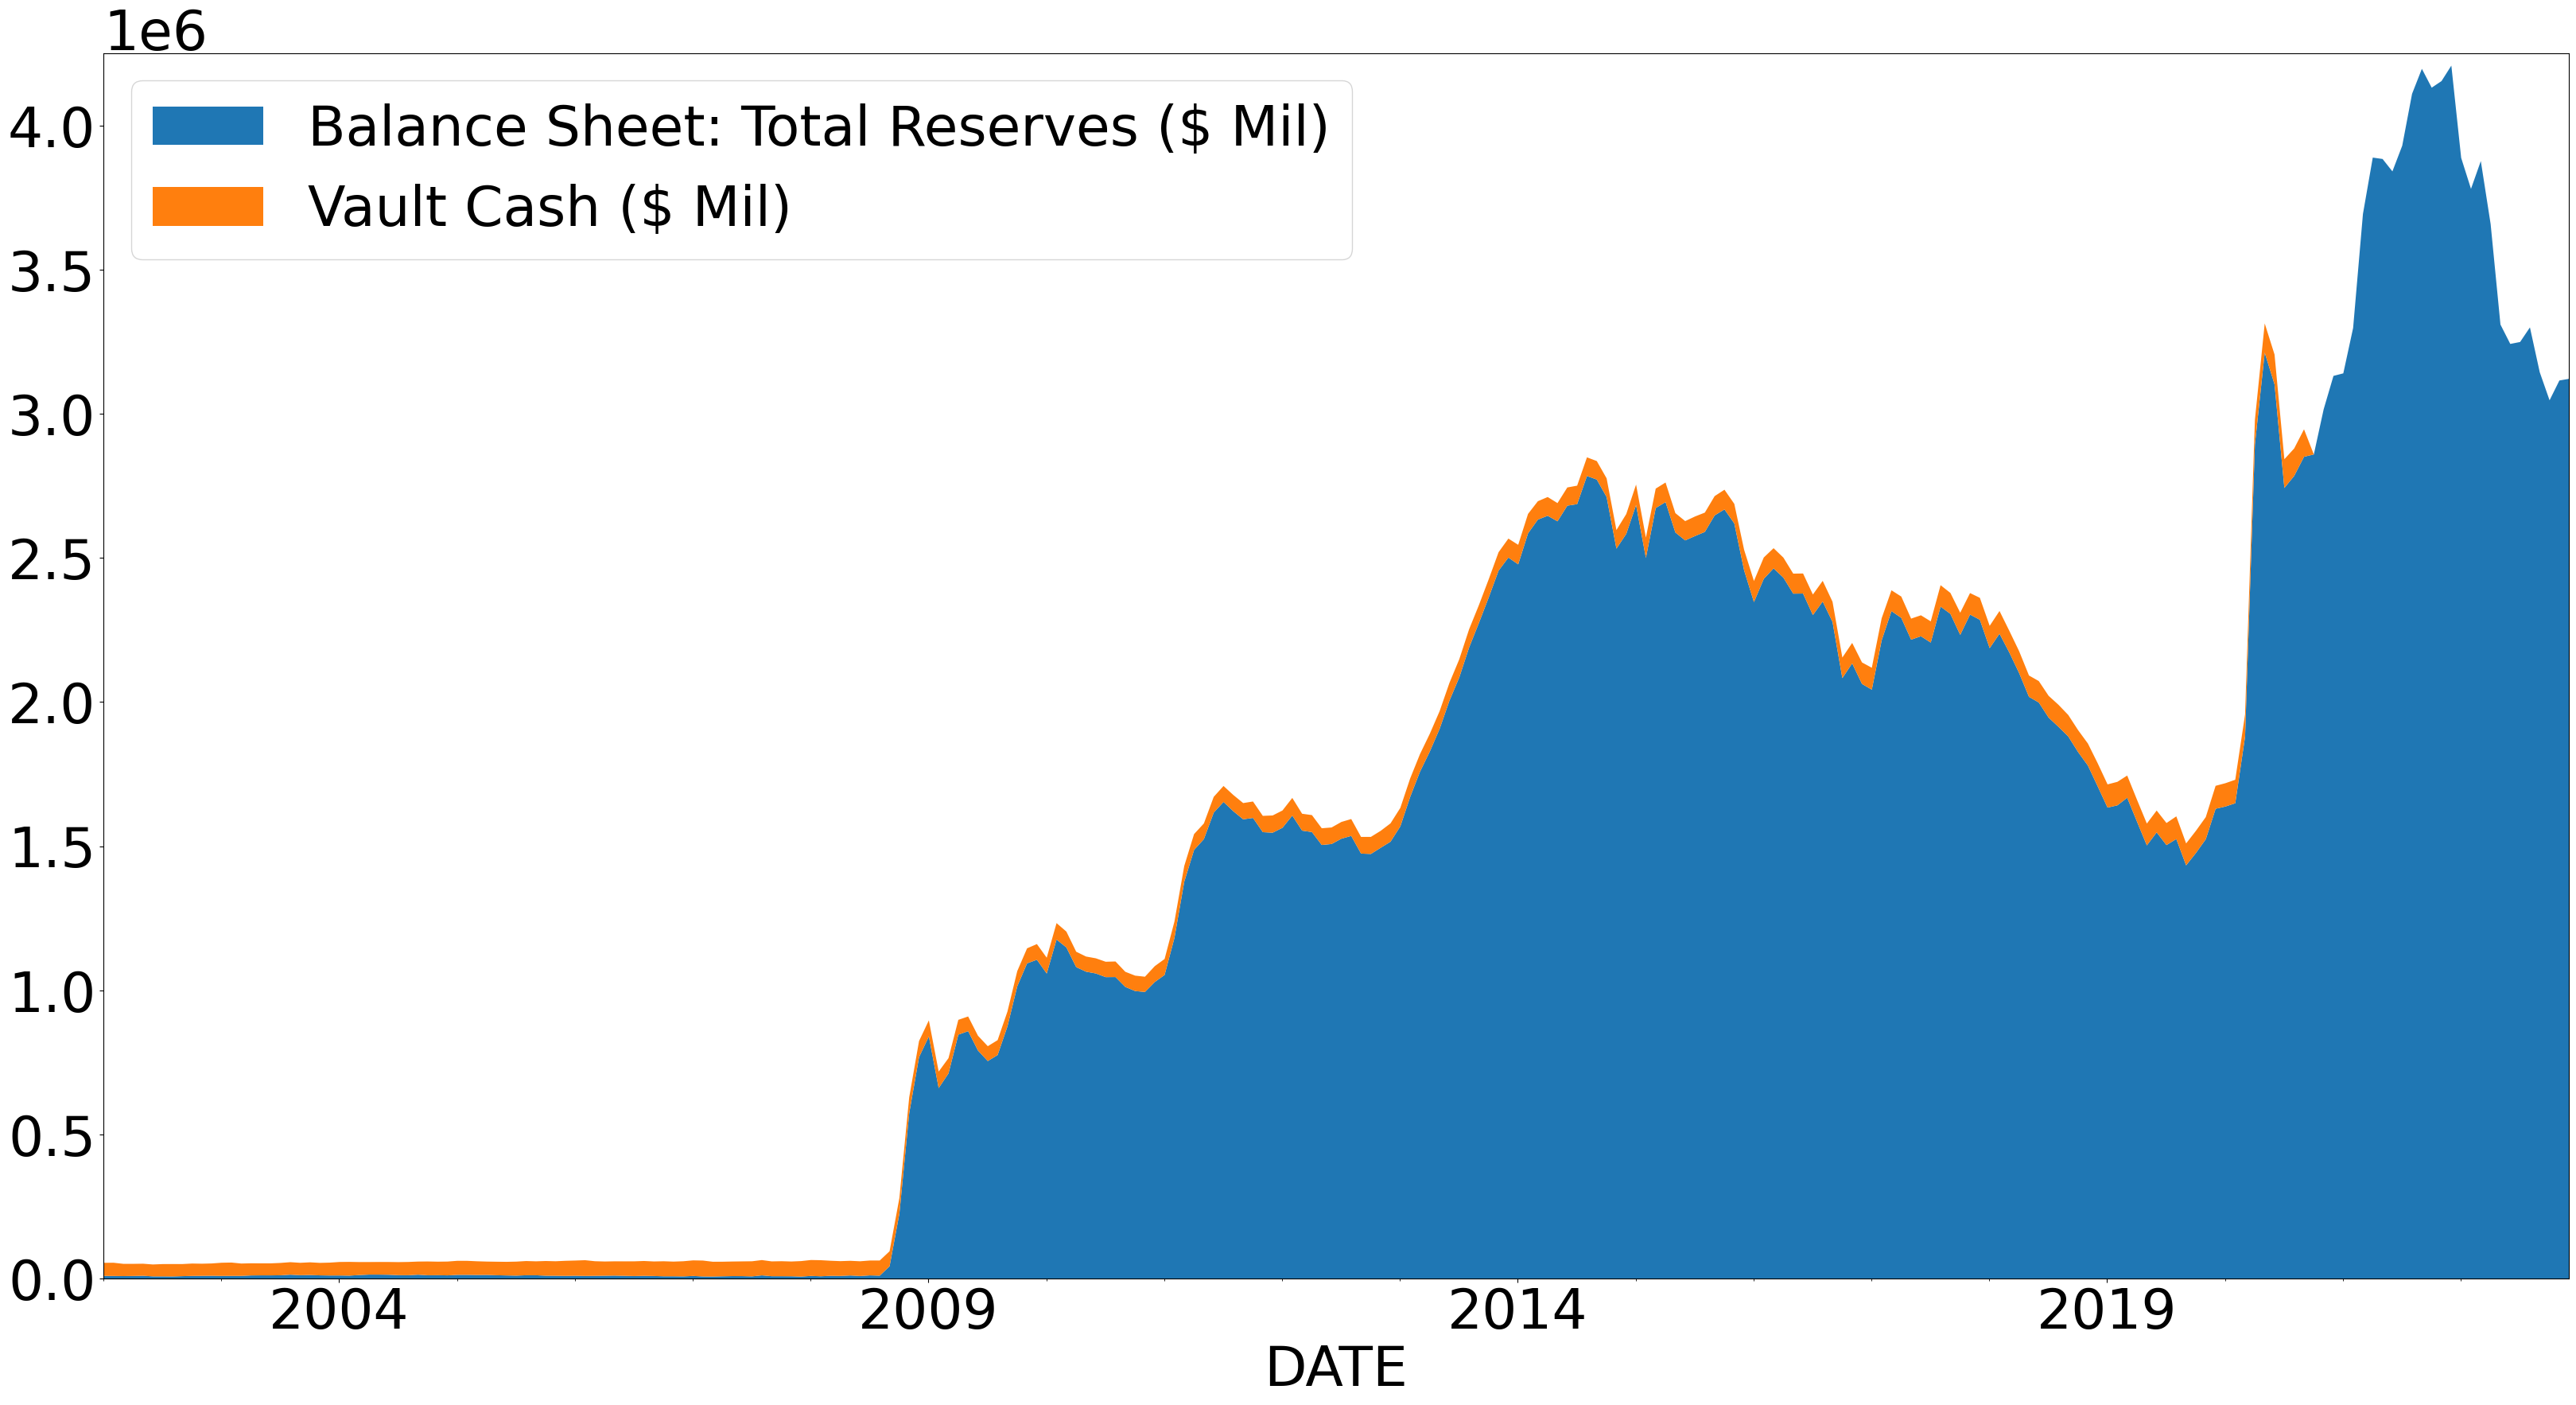

In [32]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_data = data[reserve_vars]
plot_stacked(plot_data, reserve_vars)
# currency in circulation includes vault cash

## Assets Held by the Federal Reserve

Like any bank, the Federal Reserve not only takes deposits. It invests in interest bearing assets. For most of the Fed's history, these investments were predominantly, if not wholly, comprised of U.S. Treasuries - i.e., loans to the federal government. The Federal Reserve greatly expanded operations after 2008. It began investing in mortgage backed securities and lending to private banks, holding debt from federal agencies as well as to central banks in other countries with central bank liquidity swaps. All of these can be thought of as influencing the total stock of base money. In addition to these, the Federal Reserve also lends in the overnight lending market using repurchase agreements (repos).

In [43]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
plot_data
# real estate sector is given a huge boost

Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2022-08-31                                       8428802.60   
2022-09-30                                       8393452.25   
2022-10-31                                       8316832.75   
2022-11-30                                       8222611.80   
2022-12-31                                       8162878.50   

            Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2022-08-31                                         5706898.20      
2022-09-30                                         5680889.50      
2022-10-31                                         5621114.50      
2022-11-30                                         5547311.00      
2022-12-31                                         5507528.50      

            Balance Sheet: Federal Agency Debt Securities ($ Mil)  \
DATE                                                                
2002-12-31                                               10.0       
2003-01-31                                               10.0       
2003-02-28                                               10.0       
2003-03-31                                               10.0       
2003-04-30                                               10.0       
...                                                       ...       
2022-08-31                                             2347.0       
2022-09-30                                             2347.0       
2022-10-31                                             2347.0       
2022-11-30                                             2347.0       
2022-12-31                                             2347.0       

            Balance Sheet: Mortgage-Backed Securities ($ Mil)  
DATE                                                           
2002-12-31                                               0.00  
2003-01-31                                               0.00  
2003-02-28                                               0.00  
2003-03-31                                               0.00  
2003-04-30                                               0.00  
...                                                       ...  
2022-08-31                                         2719557.40  
2022-09-30                                         2710215.50  
2022-10-31                                         2693371.50  
2022-11-30                                         2672953.40  
2022-12-31                                         2653003.25  

[241 rows x 4 columns]

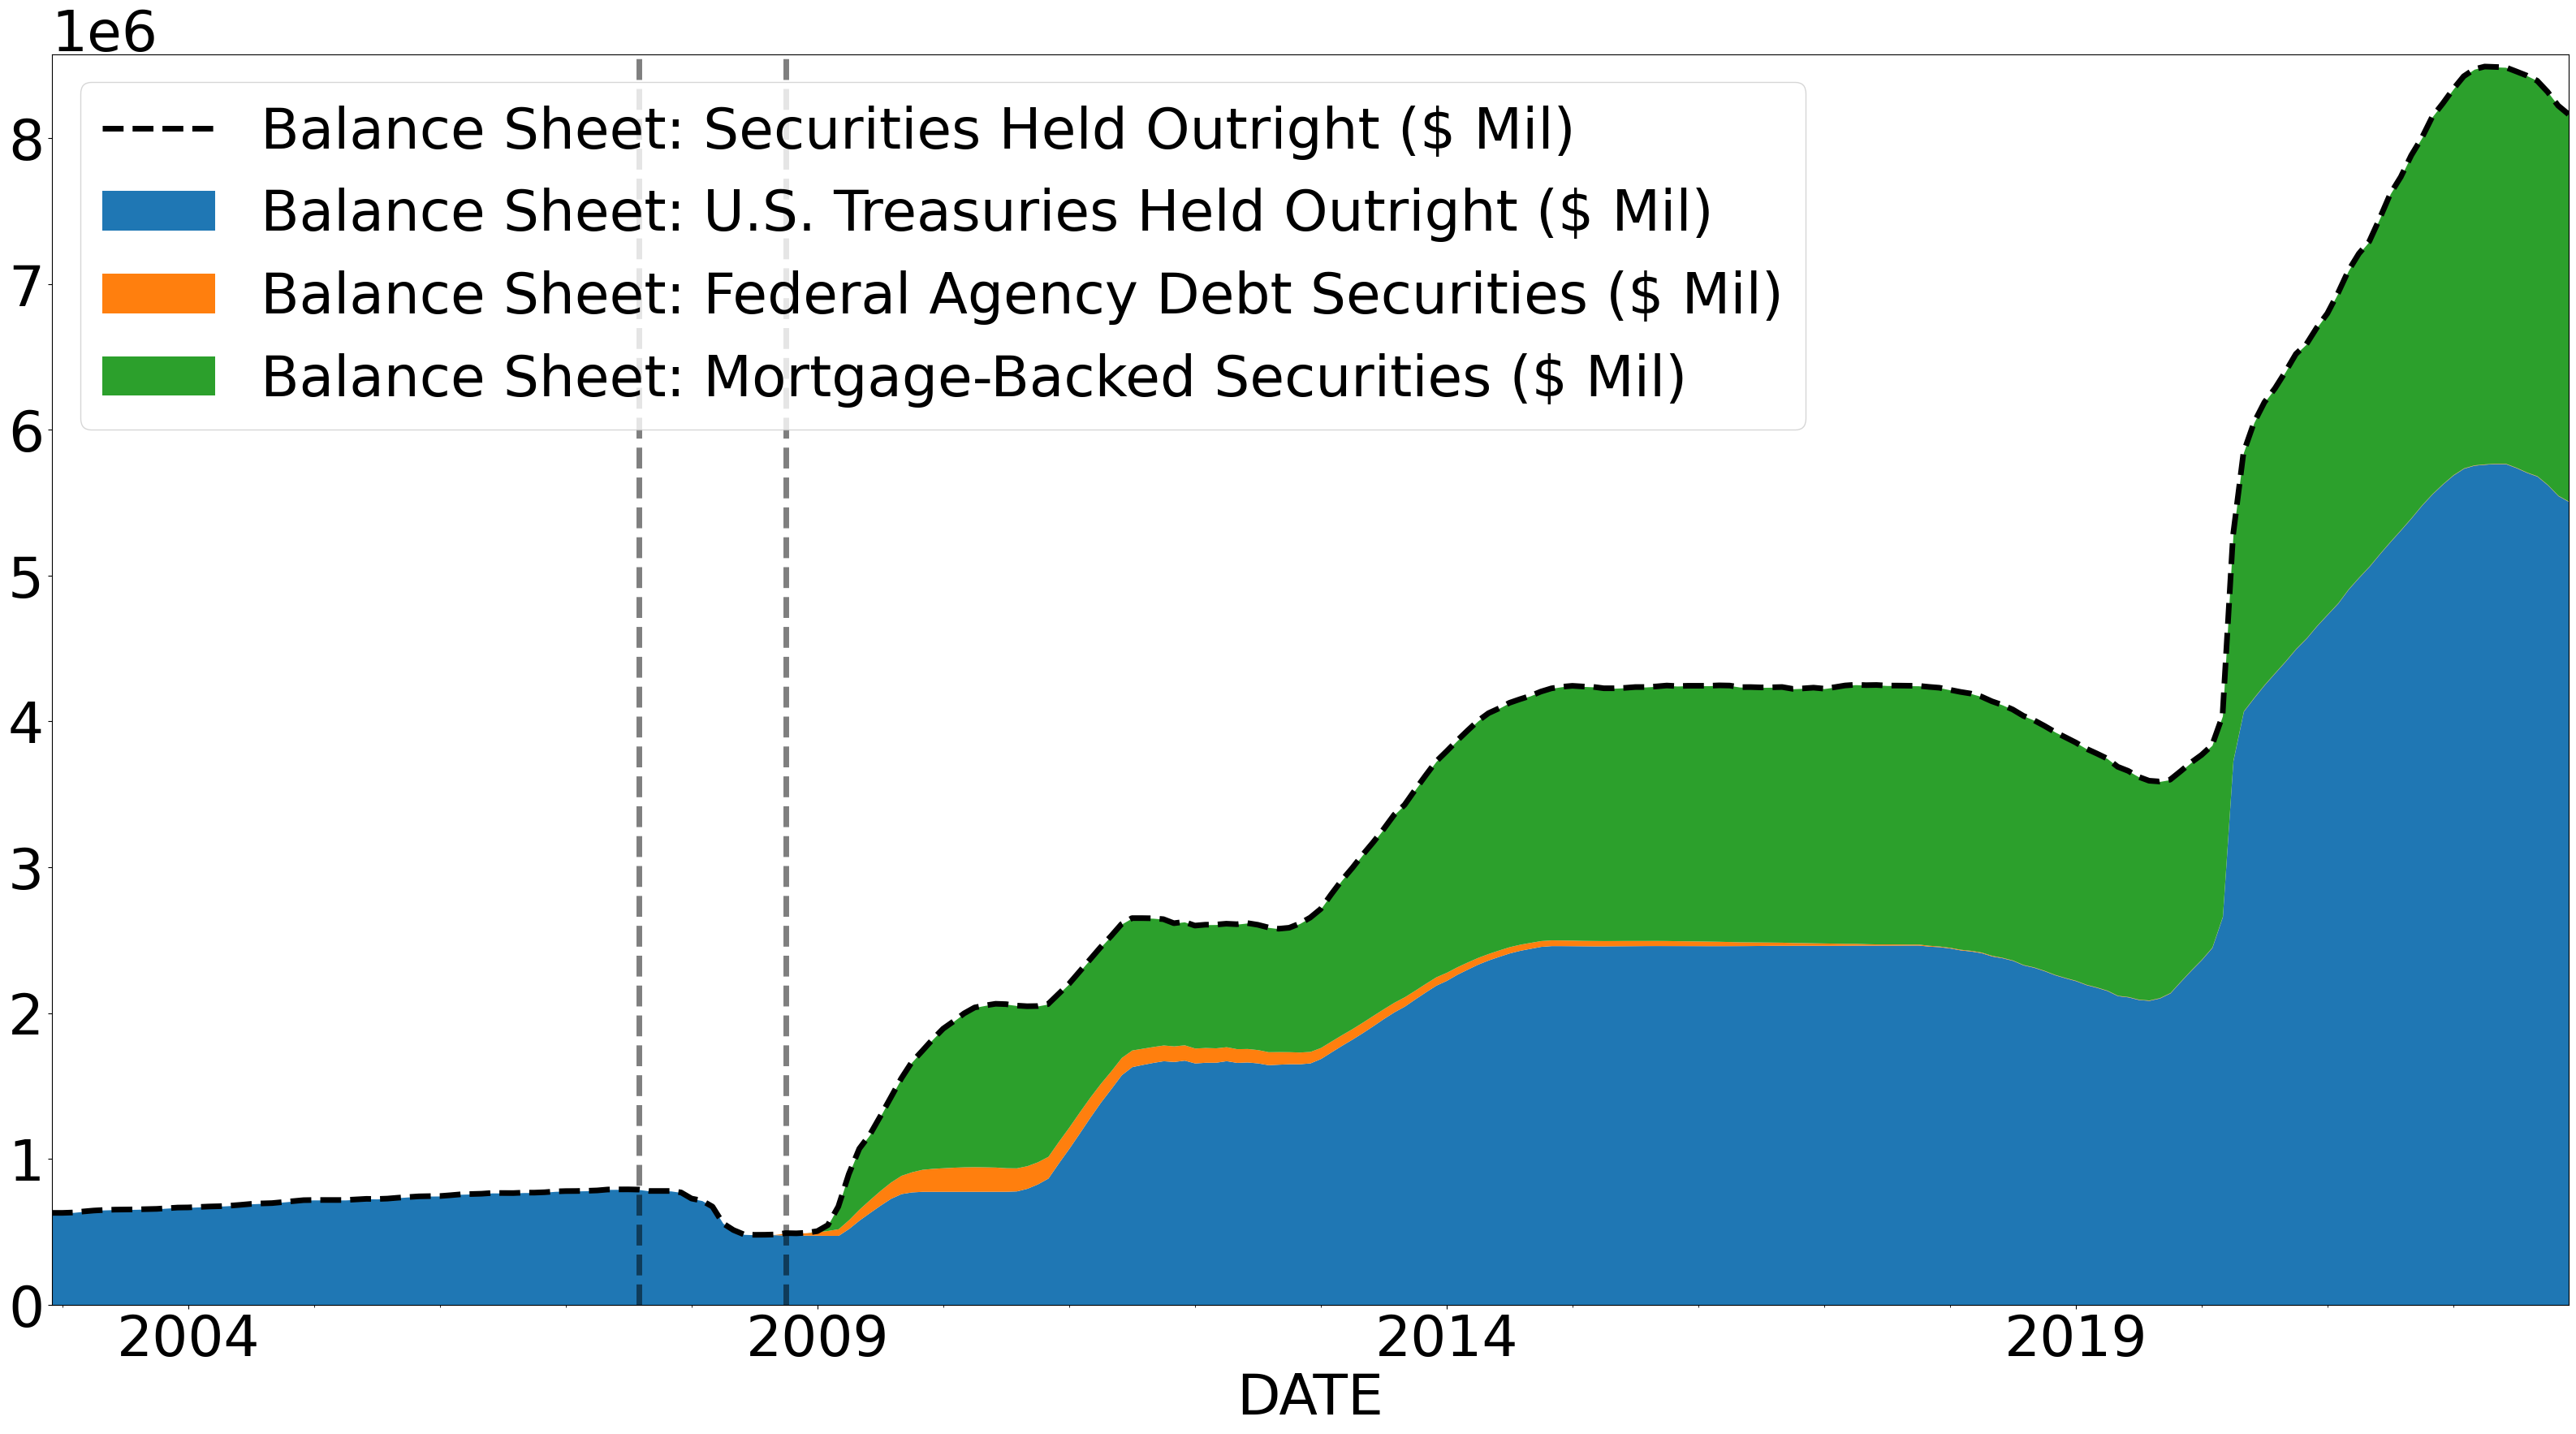

In [45]:
fig, ax = plot_stacked(df = plot_data, linewidth = 5, 
                       stack_vars = stack_vars,
                       total_var = total_var)
ax.axvline("2007-08-01", ls = "--", color = "k", linewidth = 5, alpha = .5)
ax.axvline("2008-10-01", ls = "--", color = "k", linewidth = 5, alpha = .5)

The mix of assets held by the Federal Reserve indicates the particular markets that it supports relative to those markets that do not receive direct support. From the data, it is clear that the Federal Reserve provides significant support for 1) federal borrowing and 2) mortgage markets, or in other words, real estate. Interest rates in both markets have remained relatively low throughout the period that they have received support.

In [46]:
# Continue building out balance sheet

# From securities to remaining assets

We haven't accounted for all of the assets yet

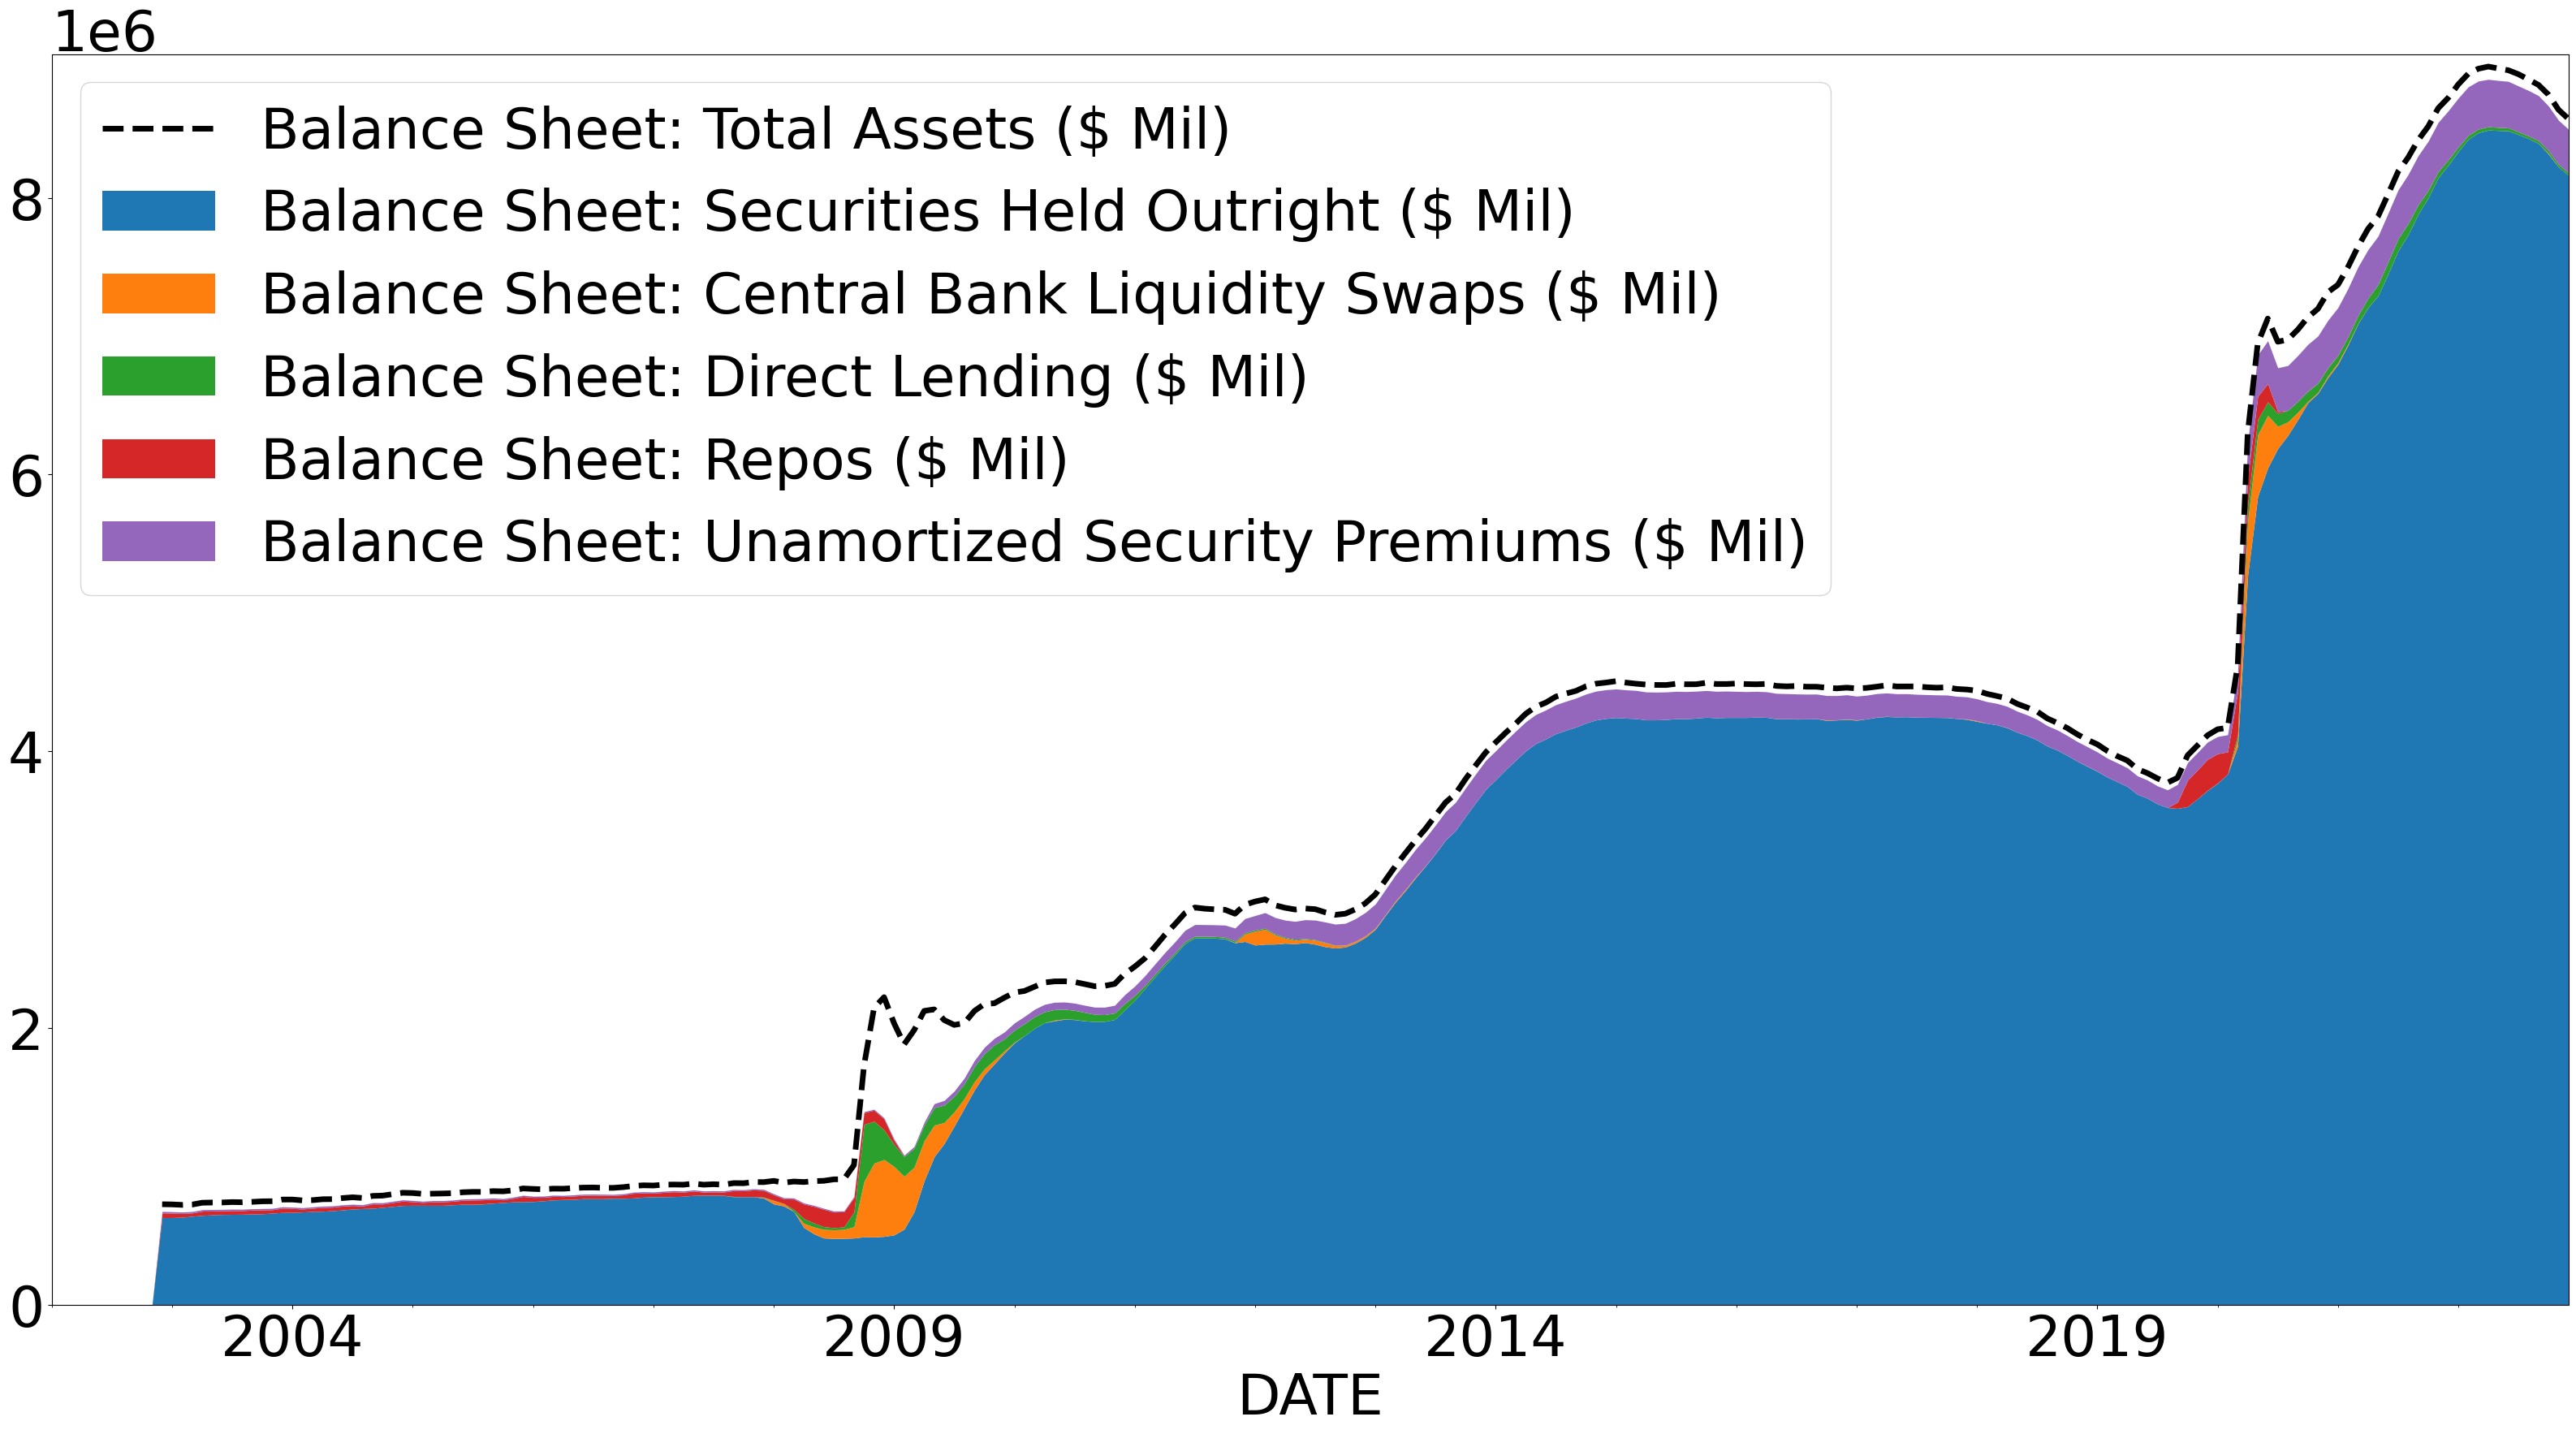

In [49]:
account_vars = ["Balance Sheet: Total Assets ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

Except for the crisis period, most of the balance sheet is explained by these five variables. Let's consolidate them into a single category that includes a few other modest categories for which we have not so far accounted.* There is still a small portion of the balance sheet unexplained during the Crisis era, but even with this included, we have explained most of the changes occuring on the asset side of the Fed's balance sheet. 


# Liabilities of the Federal Reserve

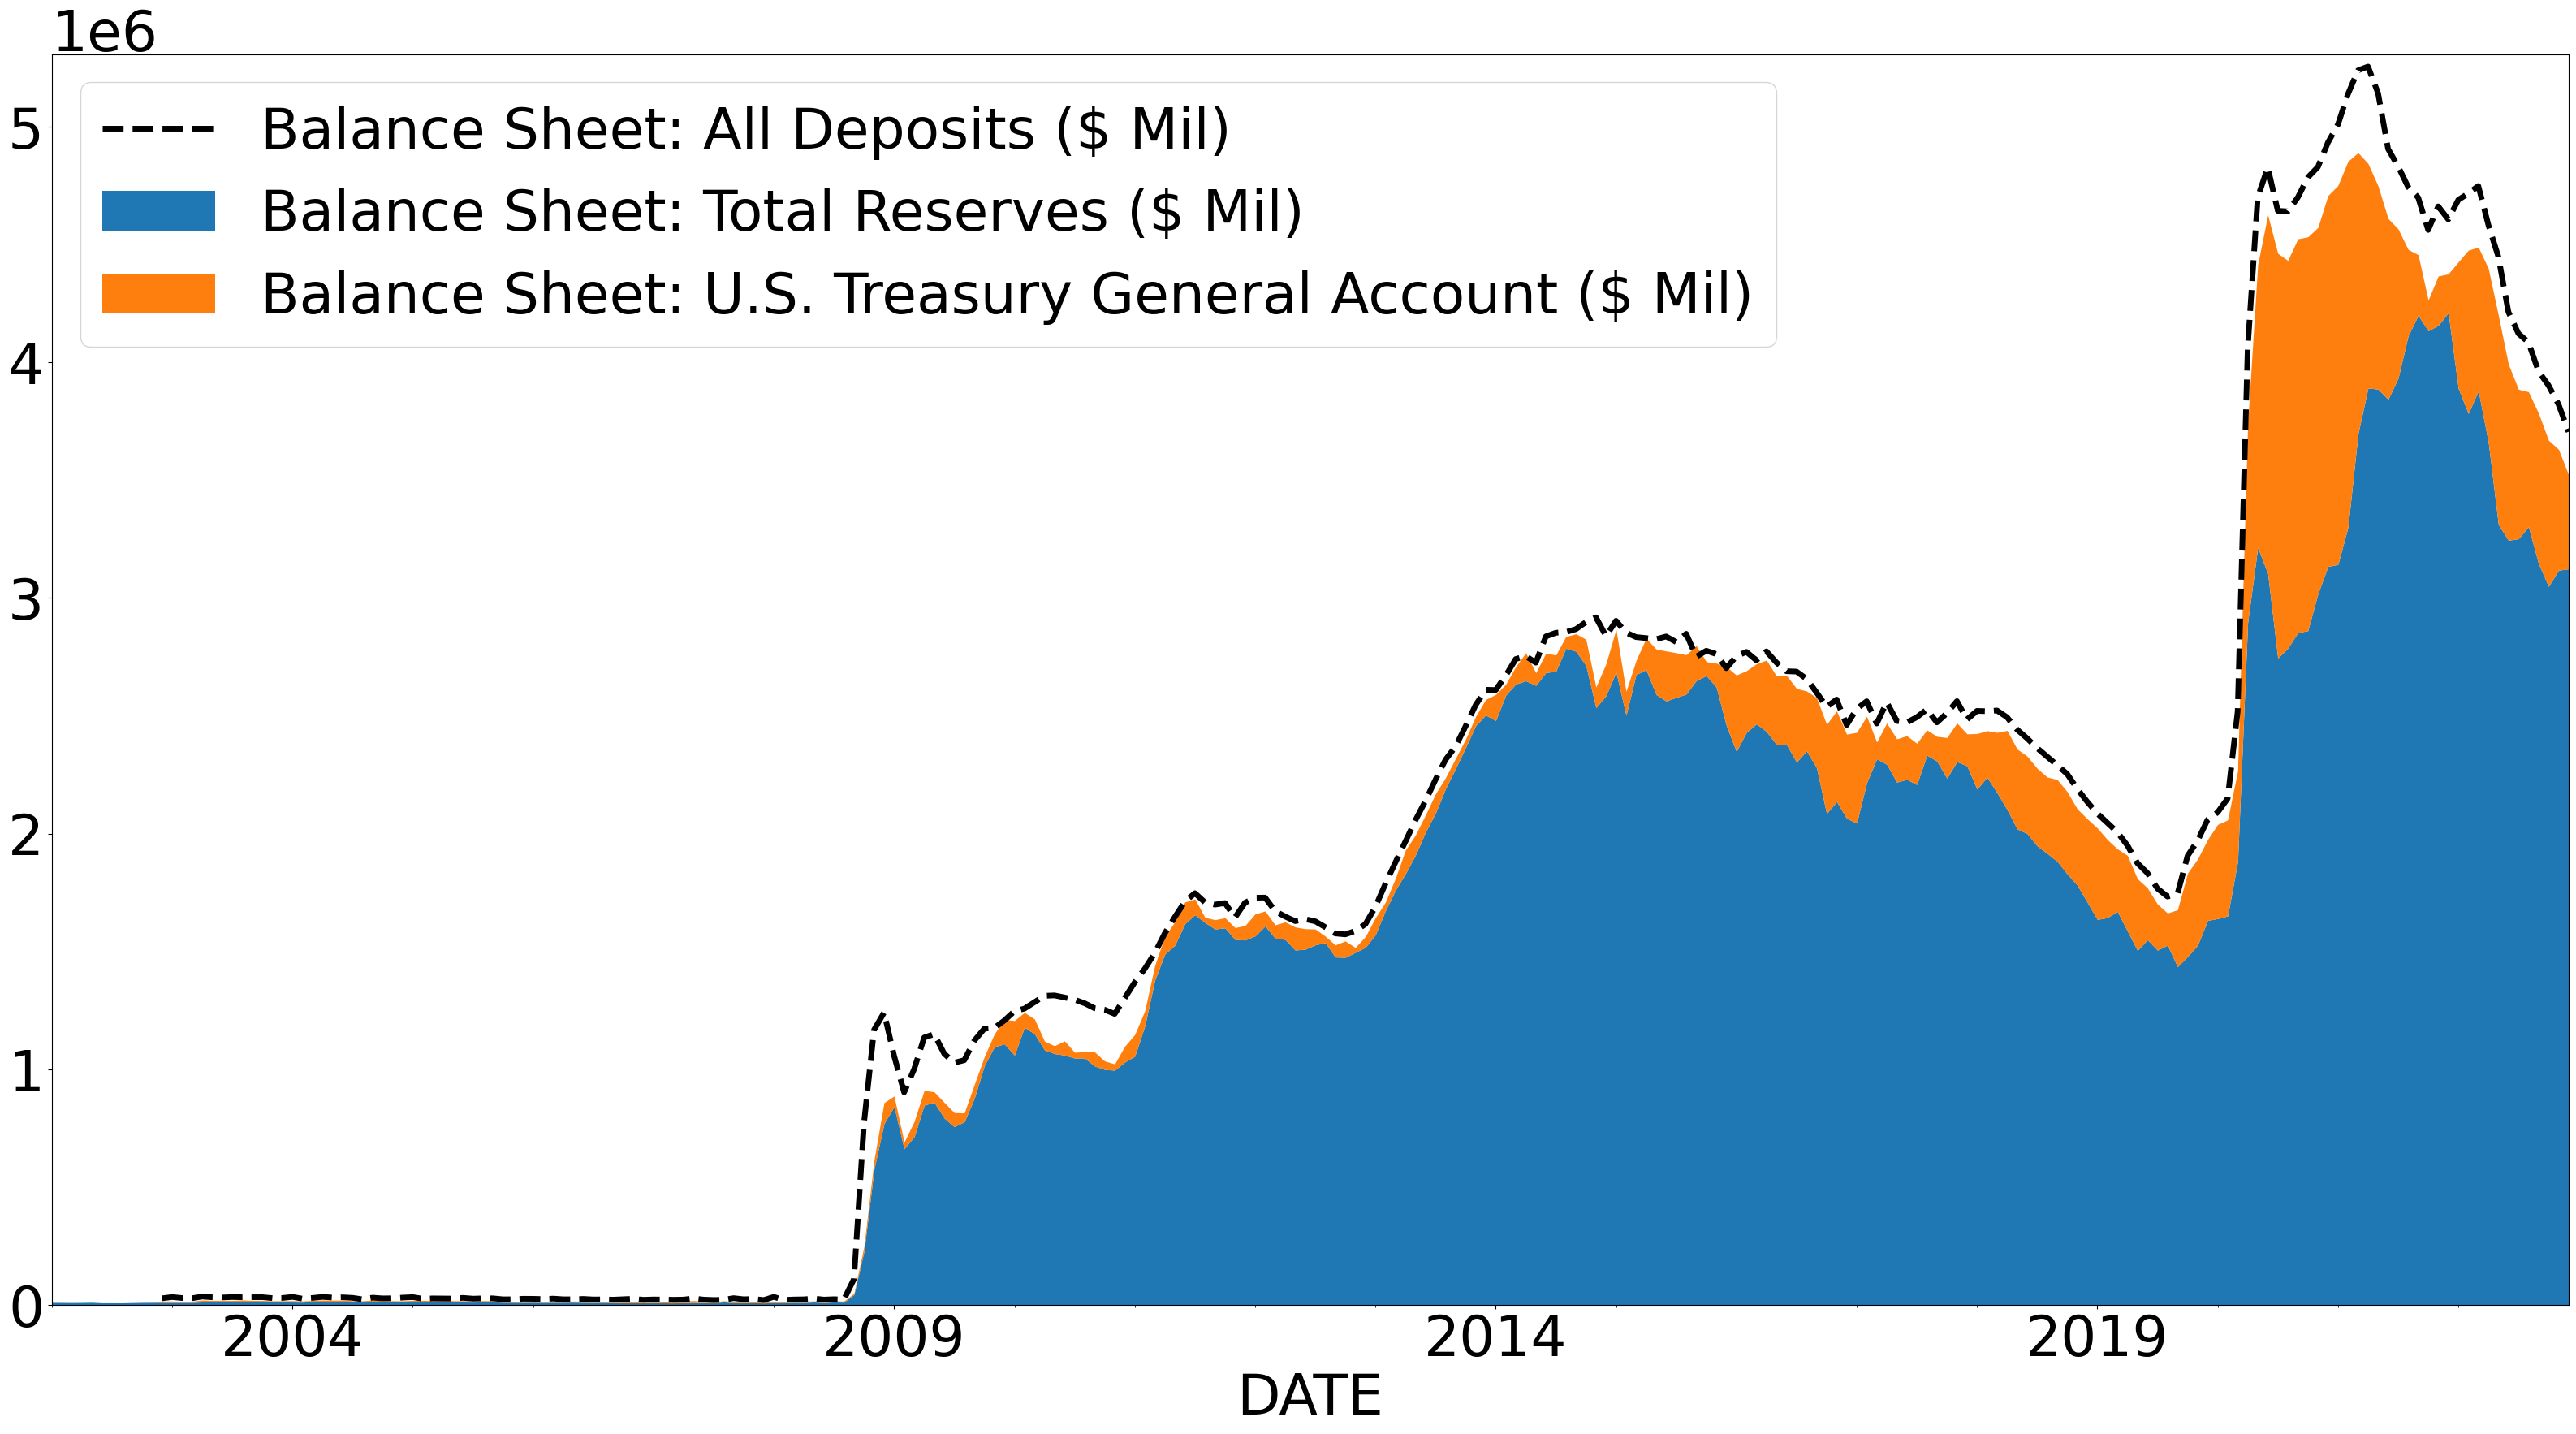

In [50]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
                      linewidth = 5,
                      stack_vars = stack_vars,
                      total_var = total_var)


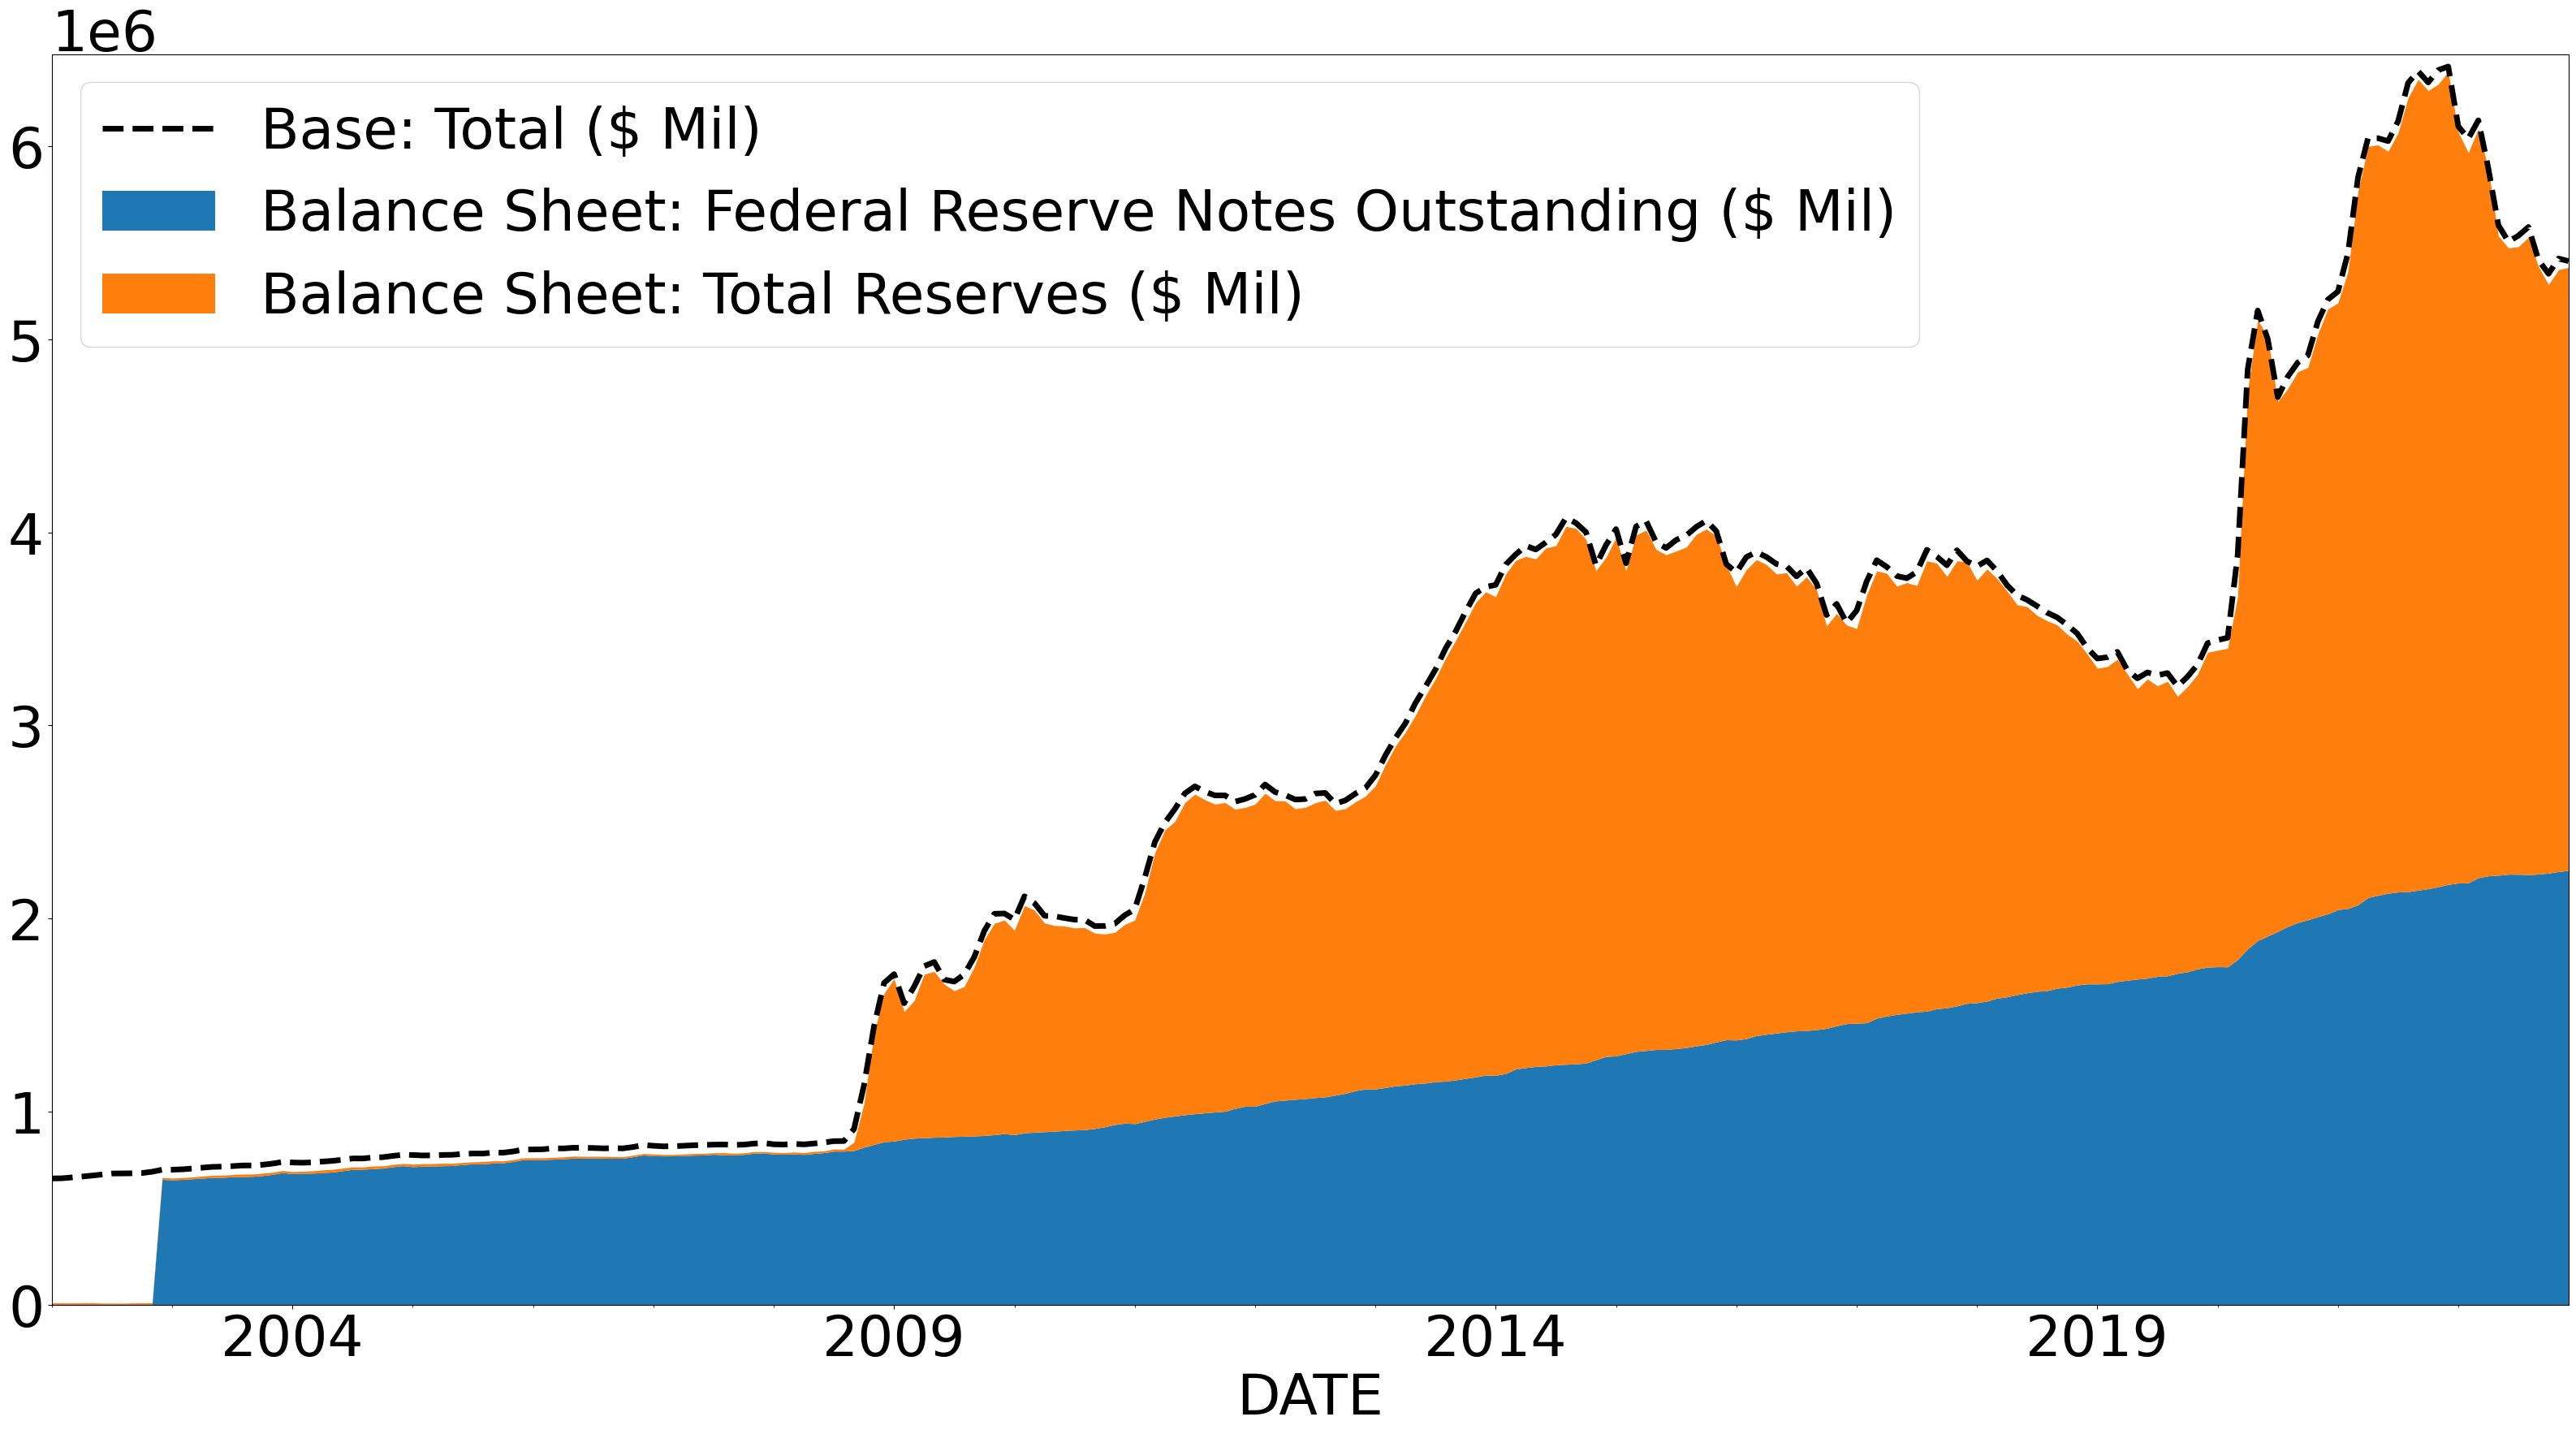

In [53]:
account_vars = ["Base: Total ($ Mil)",
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
                      linewidth = 5,
                      stack_vars = stack_vars,
                      total_var = total_var)

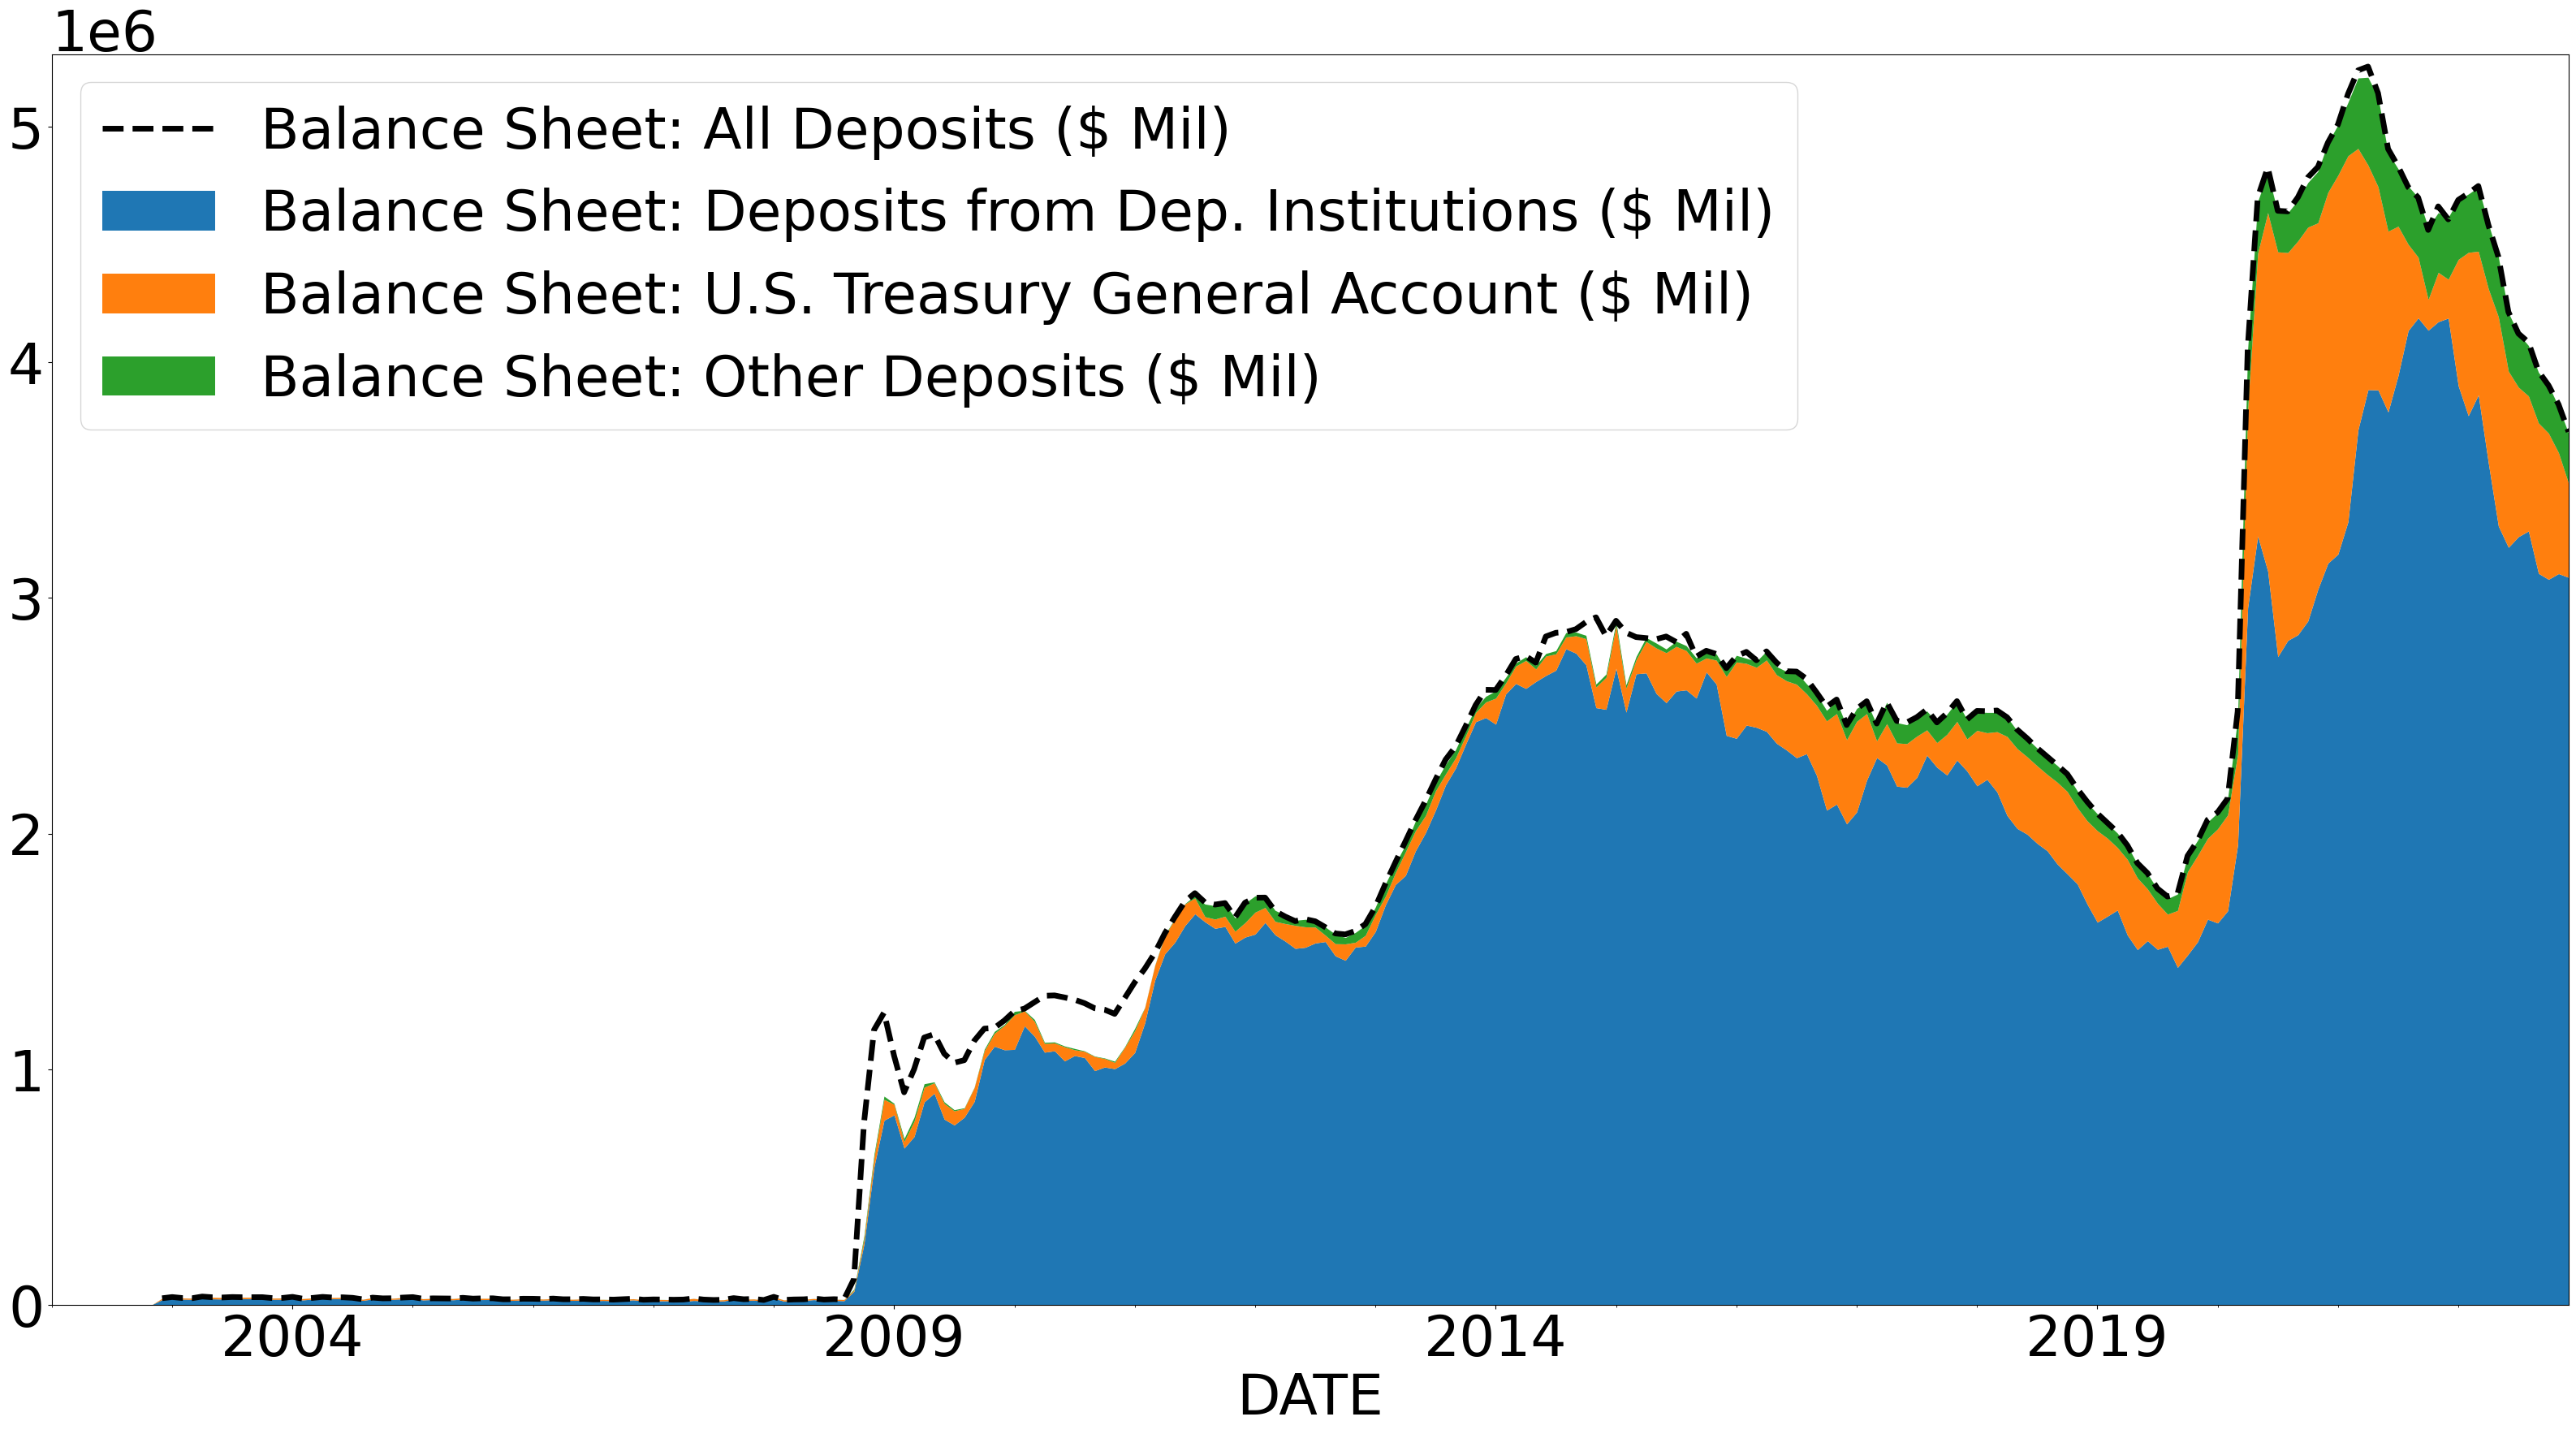

In [54]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
                      linewidth = 5,
                      stack_vars = stack_vars,
                      total_var = total_var)


If we include liabilities from activity in the overnight lending market, taking the form of reverse repurchase agreements (reverse repos), we account for nearly the entire liabilities side of the balance sheet. 

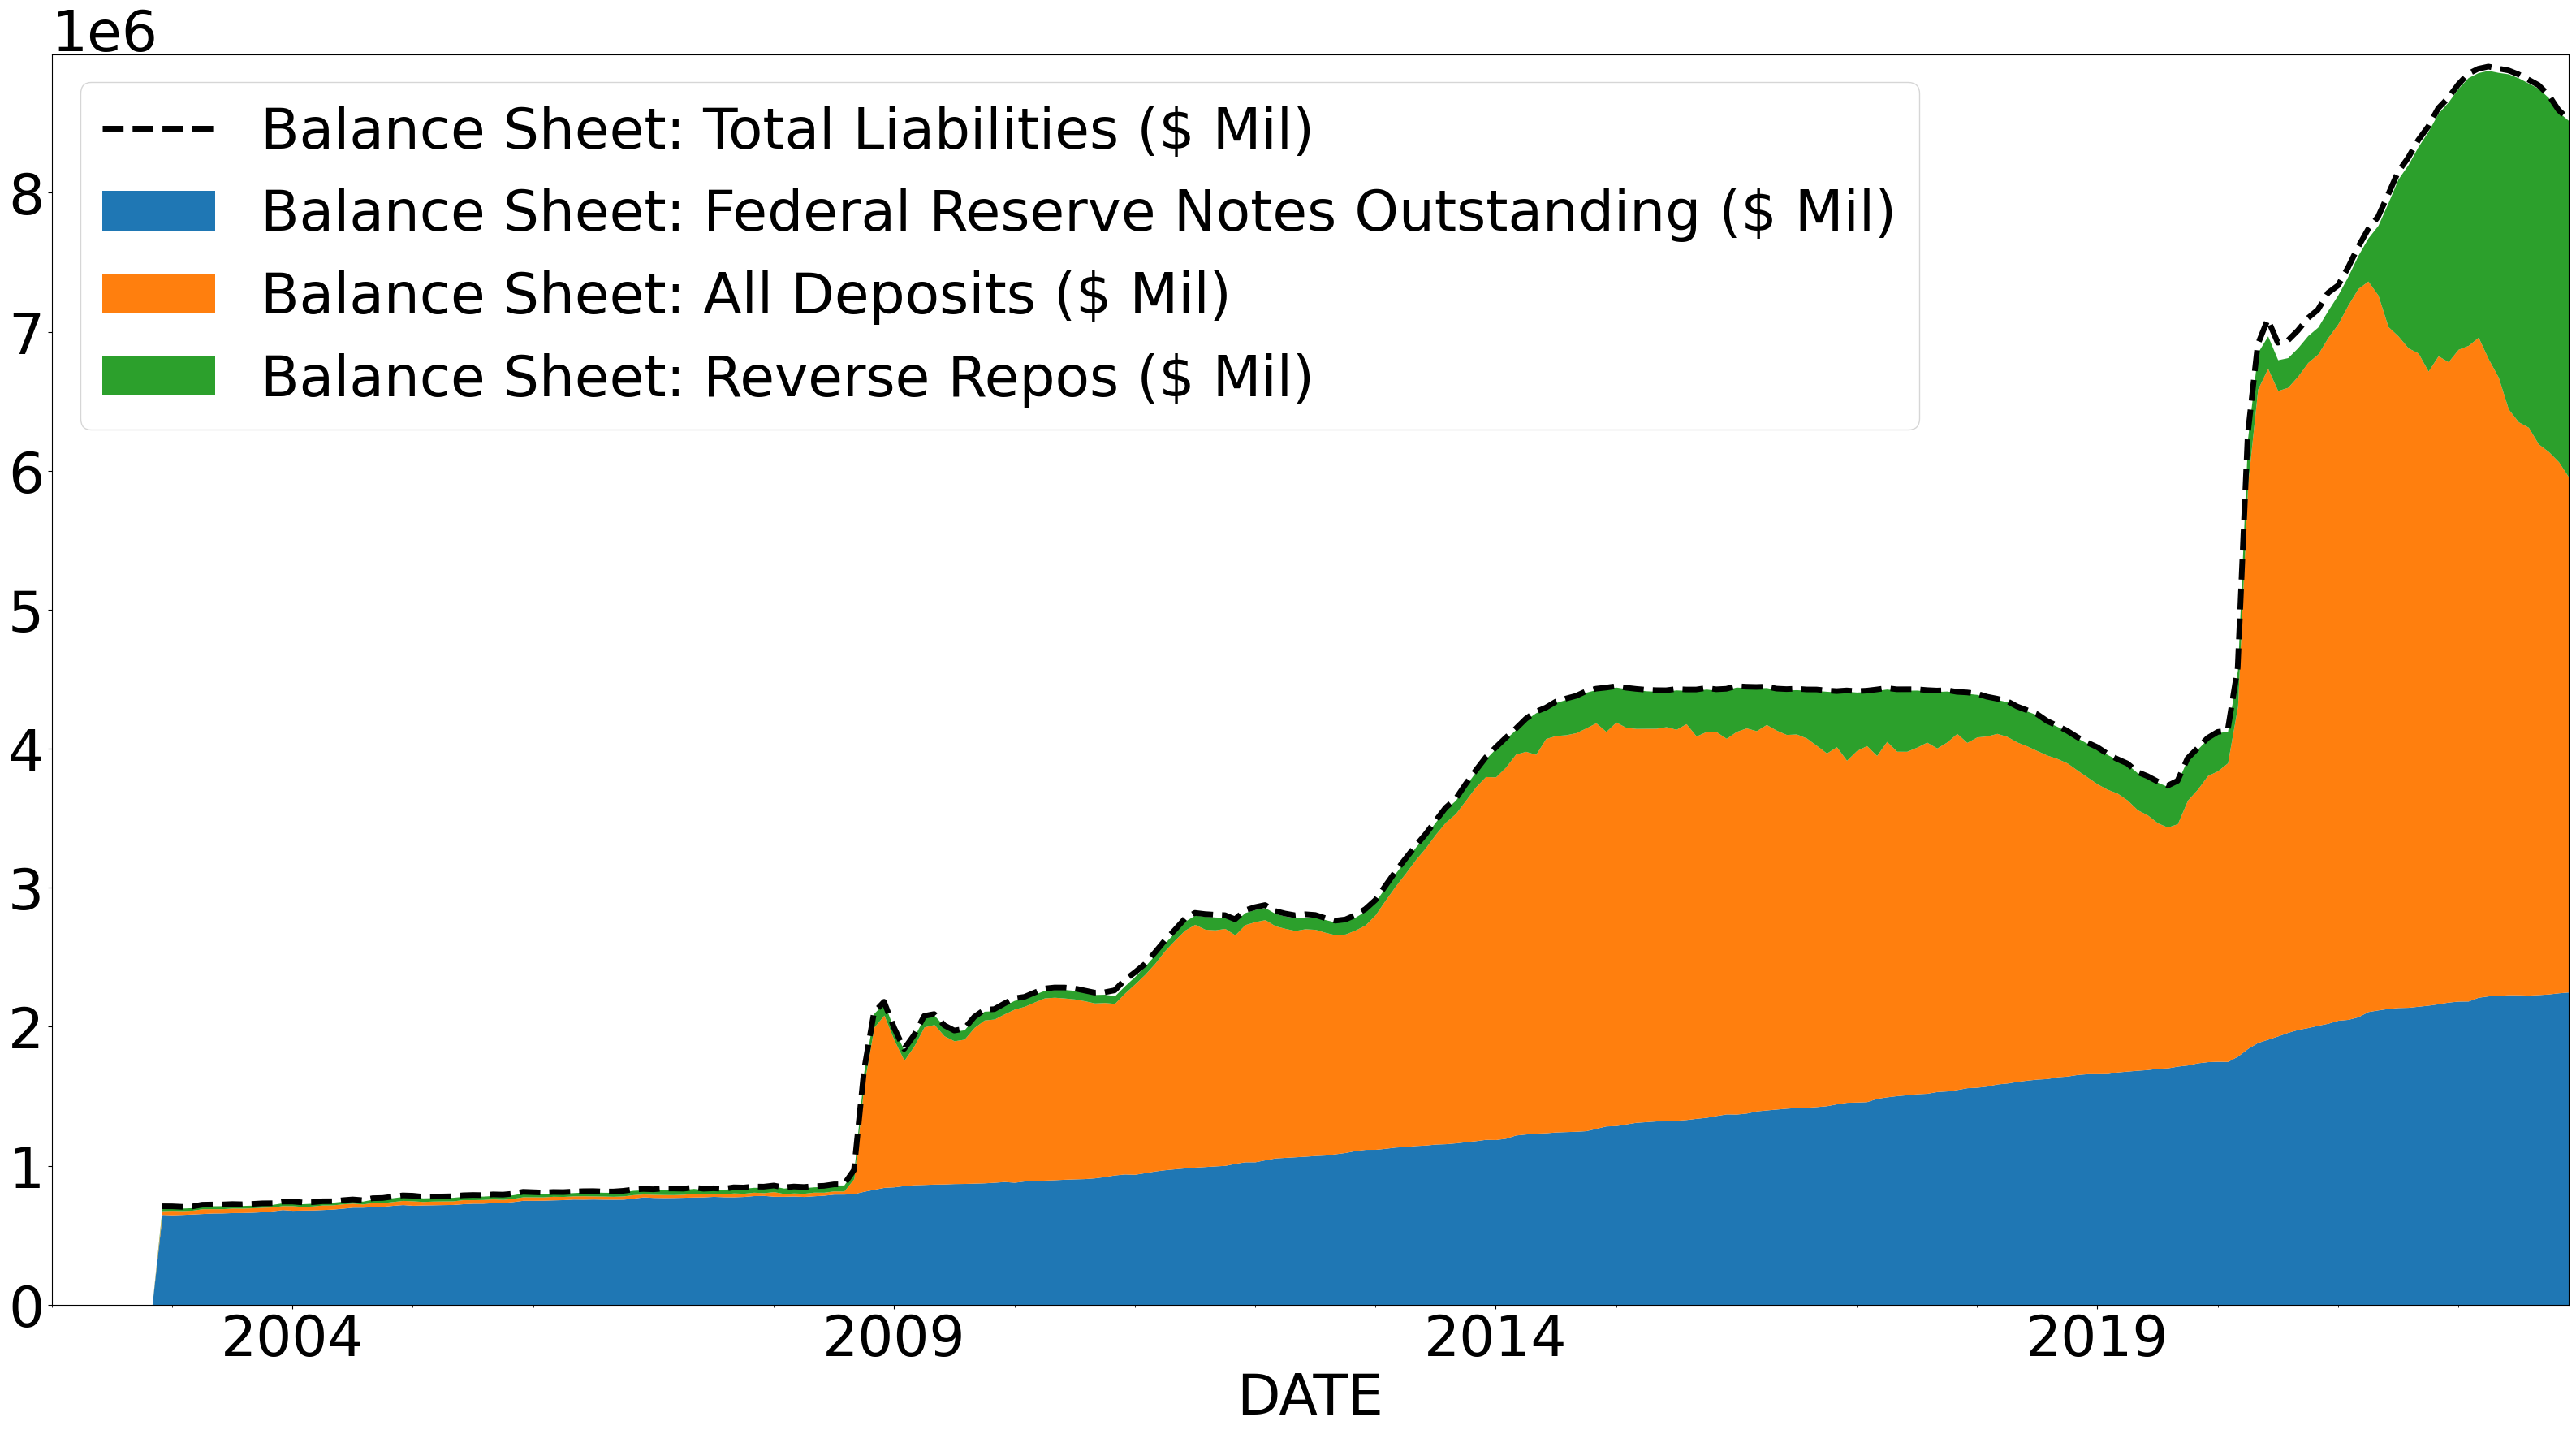

In [55]:
# Separate everything in three categories:
account_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                # approx. circulating currency
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                # federal reserve borrowing
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
                      linewidth = 5,
                      stack_vars = stack_vars,
                      total_var = total_var)


## Overnight Lending and the Federal Funds Rate

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_2732/1447047824.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


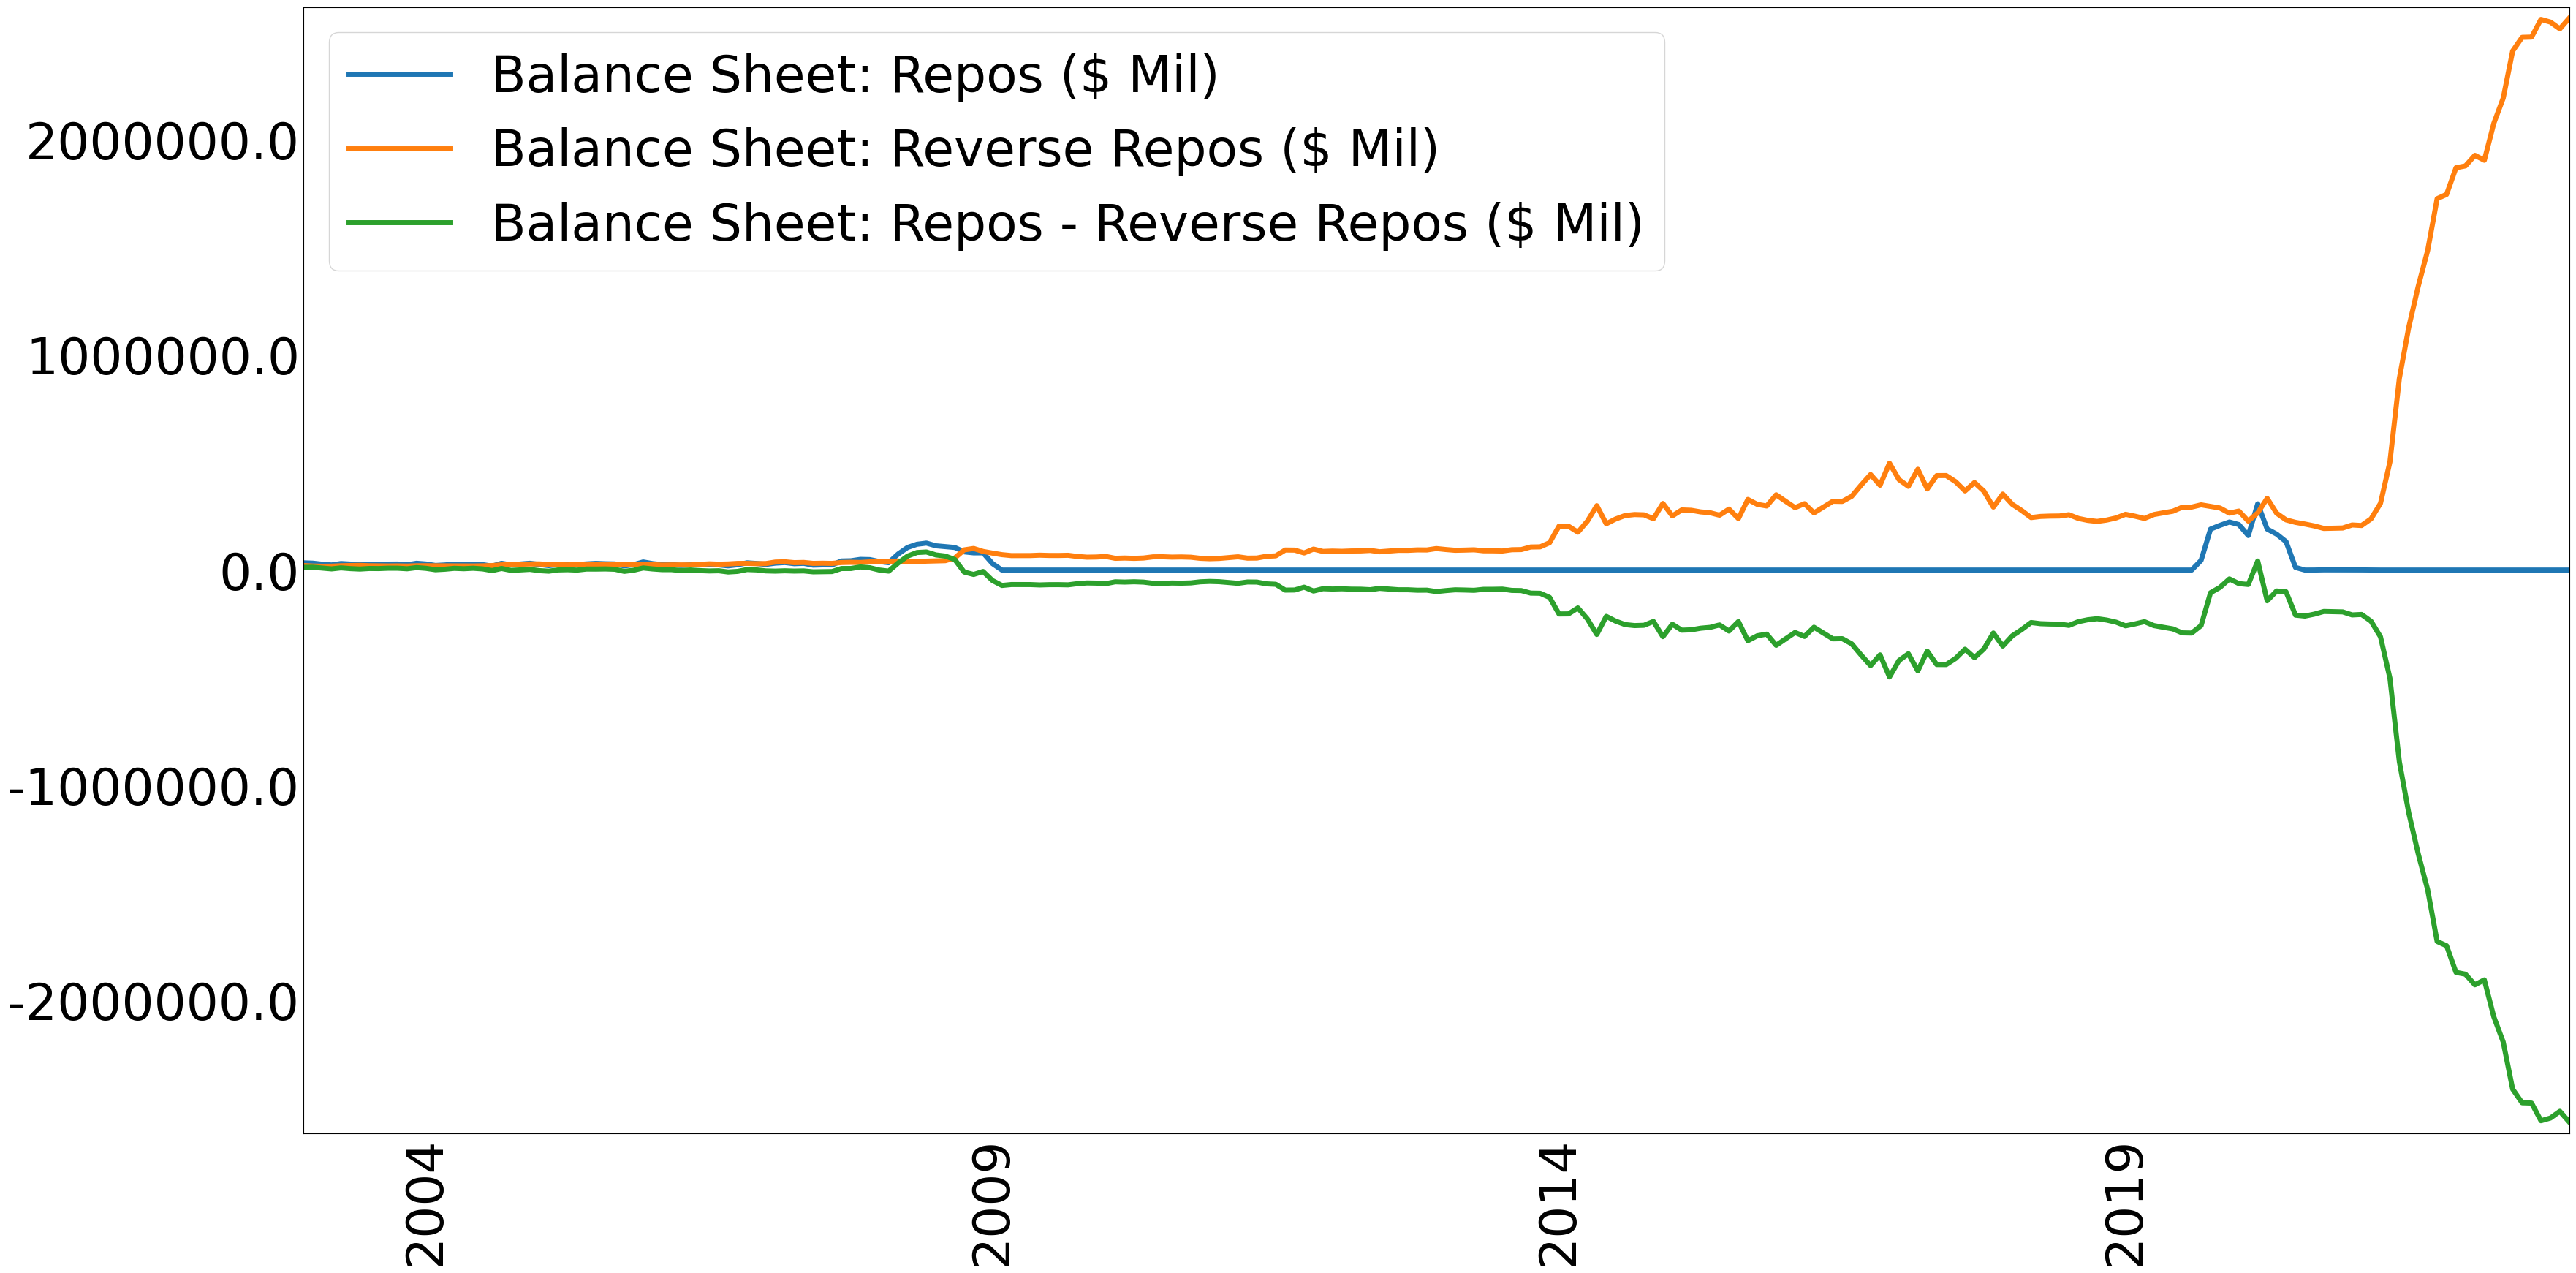

In [60]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])

overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                 "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
plot_data = data[overnight_vars].dropna()
fig, ax = plot_lines(plot_data)

The Federal Reserve has been a net borrower in the overnight lending market. Since the value of its reverse repos is greater than the value of its repos, the overall effect of Fed operations in the overnight lending market has been to *decrease* the quantity of funds available to investors in that market.